In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Data Preprocessing

In [ ]:
#importer les données
import pickle
def load_dataset(dataset_path):
  with open(dataset_path, 'rb') as reader:
      data = pickle.load(reader)


  return (data)

from google.colab import drive
drive.mount('/content/drive')

path11 = "/content/drive/My Drive/ANR-DISCRET/keywordmergedavril10min.pkl"
data20 = load_dataset(path11)

path12 = "/content/drive/My Drive/ANR-DISCRET/keywordmergedmai10min.pkl"
data21 = load_dataset(path12)

Mounted at /content/drive


In [ ]:
from google.colab import files
data = files.upload()
import pandas as pd
import io
df = pd.read_csv(io.StringIO(data['df_mai_anomalies10.csv'].decode('utf-8')),delimiter=";")

Saving df_mai_anomalies10.csv to df_mai_anomalies10 (1).csv


In [ ]:
#changer la colonne created_at comme index 
data20= data20.set_index('created_at')
data20

attaque  incendie  ...  terroriste  freqtotale
created_at                                    ...                        
2021-04-11 11:10:00+00:00       18        25  ...           0         496
2021-04-11 11:20:00+00:00       40        46  ...           5        1189
2021-04-11 11:30:00+00:00       35        42  ...           2        1193
2021-04-11 11:40:00+00:00       43        34  ...           4        1201
2021-04-11 11:50:00+00:00       57        33  ...           2        1182
...                            ...       ...  ...         ...         ...
2021-04-30 13:40:00+00:00       67         1  ...          35        1889
2021-04-30 13:50:00+00:00       79         6  ...          34        1887
2021-04-30 14:00:00+00:00       49         4  ...          27        1753
2021-04-30 14:10:00+00:00       46         6  ...          32        1721
2021-04-30 14:20:00+00:00       27         9  ...          22        1360

[2752 rows x 10 columns]

In [ ]:
data21= data21.set_index('created_at')
data21

attaque  incendie  ...  orage  freqtotale
created_at                                    ...                   
2021-04-30 19:00:00+00:00       22         9  ...      2         744
2021-04-30 19:10:00+00:00       64         7  ...      3        1426
2021-04-30 19:20:00+00:00       74         6  ...      1        1415
2021-04-30 19:30:00+00:00       59         6  ...      3        1403
2021-04-30 19:40:00+00:00       44         8  ...      6        1408
...                            ...       ...  ...    ...         ...
2021-05-24 23:20:00+00:00       54         2  ...      8        1132
2021-05-24 23:30:00+00:00       42         8  ...      3        1098
2021-05-24 23:40:00+00:00       19         1  ...      4         346
2021-05-25 11:40:00+00:00       12         4  ...      2         512
2021-05-25 19:40:00+00:00       18         4  ...      2         512

[2406 rows x 13 columns]

In [ ]:
#diviser les données en train/test
data1 = data20['freqtotale']
data1 = pd.DataFrame(data1)

data1attaque = data20['attaque']
data1attaque = pd.DataFrame(data1attaque)

data1incendie = data20['incendie']
data1incendie = pd.DataFrame(data1incendie)

data1accident = data20['accident']
data1accident = pd.DataFrame(data1accident)

data1secours = data20['secours']
data1secours = pd.DataFrame(data1secours)

data1agression = data20['agression']
data1agression = pd.DataFrame(data1agression)

data1paris = data20['paris']
data1paris = pd.DataFrame(data1paris)

data1nice = data20['nice']
data1nice = pd.DataFrame(data1nice)

data1lyon = data20['lyon']
data1lyon = pd.DataFrame(data1lyon)

data1terroriste = data20['terroriste']
data1terroriste = pd.DataFrame(data1terroriste)


In [ ]:

test1freqtotale = data21
test1freqtotale = test1freqtotale[['freqtotale']]


test1attaque = data21
test1attaque = test1attaque[['attaque']]


test1incendie = data21
test1incendie = test1incendie[['incendie']]

test1accident = data21
test1accident = test1accident[['accident']]


test1secours = data21
test1secours = test1secours[['secours']]


test1agression = data21
test1agression= test1agression[['agression']]


test1paris = data21
test1paris= test1paris[['paris']]


test1nice = data21
test1nice = test1nice[['nice']]

test1lyon = data21
test1lyon= test1lyon[['lyon']]


test1terroriste = data21
test1terroriste = test1terroriste[['terroriste']]


# preprocessing

In [ ]:
#mise à l'échelle des données
from sklearn.preprocessing import RobustScaler



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(data1[['freqtotale']])
scaler = scaler.fit(data1attaque[['attaque']])
scaler = scaler.fit(data1incendie[['incendie']])
scaler = scaler.fit(data1accident[['accident']])
scaler = scaler.fit(data1agression[['agression']])
scaler = scaler.fit(data1paris[['paris']])
scaler = scaler.fit(data1nice[['nice']])
scaler = scaler.fit(data1lyon[['lyon']])
scaler = scaler.fit(data1terroriste[['terroriste']])
scaler = scaler.fit(data1secours[['secours']])

data1['freqtotale'] = scaler.transform(data1[['freqtotale']])
test1freqtotale['freqtotale'] = scaler.transform(test1freqtotale[['freqtotale']])


data1incendie['attaque'] = scaler.transform(data1attaque[['attaque']])
test1attaque['attaque'] = scaler.transform(test1attaque[['attaque']])

data1incendie['incendie'] = scaler.transform(data1incendie[['incendie']])
test1incendie['incendie'] = scaler.transform(test1incendie[['incendie']])

data1accident['accident'] = scaler.transform(data1accident[['accident']])
test1accident['accident'] = scaler.transform(test1accident[['accident']])

data1agression['agression'] = scaler.transform(data1agression[['agression']])
test1agression['agression'] = scaler.transform(test1agression[['agression']])

data1paris['paris'] = scaler.transform(data1paris[['paris']])
test1paris['paris'] = scaler.transform(test1paris[['paris']])

data1nice['nice'] = scaler.transform(data1nice[['nice']])
test1nice['nice'] = scaler.transform(test1nice[['nice']])


data1lyon['lyon'] = scaler.transform(data1lyon[['lyon']])
test1lyon['lyon'] = scaler.transform(test1lyon[['lyon']])


data1terroriste['terroriste'] = scaler.transform(data1terroriste[['terroriste']])
test1terroriste['terroriste'] = scaler.transform(test1terroriste[['terroriste']])


data1secours['secours'] = scaler.transform(data1secours[['secours']])
test1secours['secours'] = scaler.transform(test1secours[['secours']])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
#redimentionner les vecteurs train/test en des vecteurs de dimensions 3
TIME_STEPS = 5

# reshape to [samples, time_steps, n_features]

X_train1, y_train1 = create_dataset(data1, data1.freqtotale, TIME_STEPS)
X_test1, y_test1 = create_dataset(test1freqtotale, test1freqtotale.freqtotale, TIME_STEPS)


X_train1attaque, y_train1attaque = create_dataset(data1attaque, data1attaque.attaque, TIME_STEPS)
X_test1attaque, y_test1attaque = create_dataset(test1attaque, test1attaque.attaque, TIME_STEPS)


X_train1incendie, y_train1incendie = create_dataset(data1incendie, data1incendie.incendie, TIME_STEPS)
X_test1incendie, y_test1incendie = create_dataset(test1incendie, test1incendie.incendie, TIME_STEPS)


X_train1accident, y_train1accident = create_dataset(data1accident, data1accident.accident, TIME_STEPS)
X_test1accident, y_test1accident = create_dataset(test1accident, test1accident.accident, TIME_STEPS)


X_train1agression, y_train1agression = create_dataset(data1agression, data1agression.agression, TIME_STEPS)
X_test1agression, y_test1agression = create_dataset(test1agression, test1agression.agression, TIME_STEPS)


X_train1paris, y_train1paris = create_dataset(data1paris, data1paris.paris, TIME_STEPS)
X_test1paris, y_test1paris = create_dataset(test1paris, test1paris.paris, TIME_STEPS)


X_train1nice, y_train1nice = create_dataset(data1nice, data1nice.nice, TIME_STEPS)
X_test1nice, y_test1nice = create_dataset(test1nice, test1nice.nice, TIME_STEPS)


X_train1lyon, y_train1lyon = create_dataset(data1lyon, data1lyon.lyon, TIME_STEPS)
X_test1lyon, y_test1lyon = create_dataset(test1lyon, test1lyon.lyon, TIME_STEPS)


X_train1terroriste, y_train1terroriste = create_dataset(data1terroriste, data1terroriste.terroriste, TIME_STEPS)
X_test1terroriste, y_test1terroriste = create_dataset(test1terroriste, test1terroriste.terroriste, TIME_STEPS)


X_train1secours, y_train1secours = create_dataset(data1secours, data1secours.secours, TIME_STEPS)
X_test1secours, y_test1secours = create_dataset(test1secours, test1secours.secours, TIME_STEPS)

print(X_train1.shape, y_train1.shape)

(2747, 5, 1) (2747,)


# Modeling

In [ ]:
#définir le modele LSTM
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64, 
    input_shape=(X_train1.shape[1], X_train1.shape[2])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train1.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train1.shape[2])))

model.compile(loss='mae', optimizer='adam')

## Training

In [ ]:
#entrainement du modele
history = model.fit(
    X_train1, y_train1, 
    epochs=40, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/40
78/78 [==============================] - 1s 8ms/step - loss: 8.7032 - val_loss: 9.2050
Epoch 2/40
78/78 [==============================] - 1s 8ms/step - loss: 8.5915 - val_loss: 9.4007
Epoch 3/40
78/78 [==============================] - 1s 8ms/step - loss: 8.7032 - val_loss: 8.9731
Epoch 4/40
78/78 [==============================] - 1s 8ms/step - loss: 8.5034 - val_loss: 9.0187
Epoch 5/40
78/78 [==============================] - 1s 7ms/step - loss: 8.6300 - val_loss: 8.9889
Epoch 6/40
78/78 [==============================] - 1s 7ms/step - loss: 8.5604 - val_loss: 8.8920
Epoch 7/40
78/78 [==============================] - 1s 8ms/step - loss: 8.5418 - val_loss: 8.9200
Epoch 8/40
78/78 [==============================] - 1s 8ms/step - loss: 8.5653 - val_loss: 8.8456
Epoch 9/40
78/78 [==============================] - 1s 8ms/step - loss: 8.5290 - val_loss: 8.9024
Epoch 10/40
78/78 [==============================] - 1s 7ms/step - loss: 8.5232 - val_loss: 8.8396
Epoch 11/40
78/78 [

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


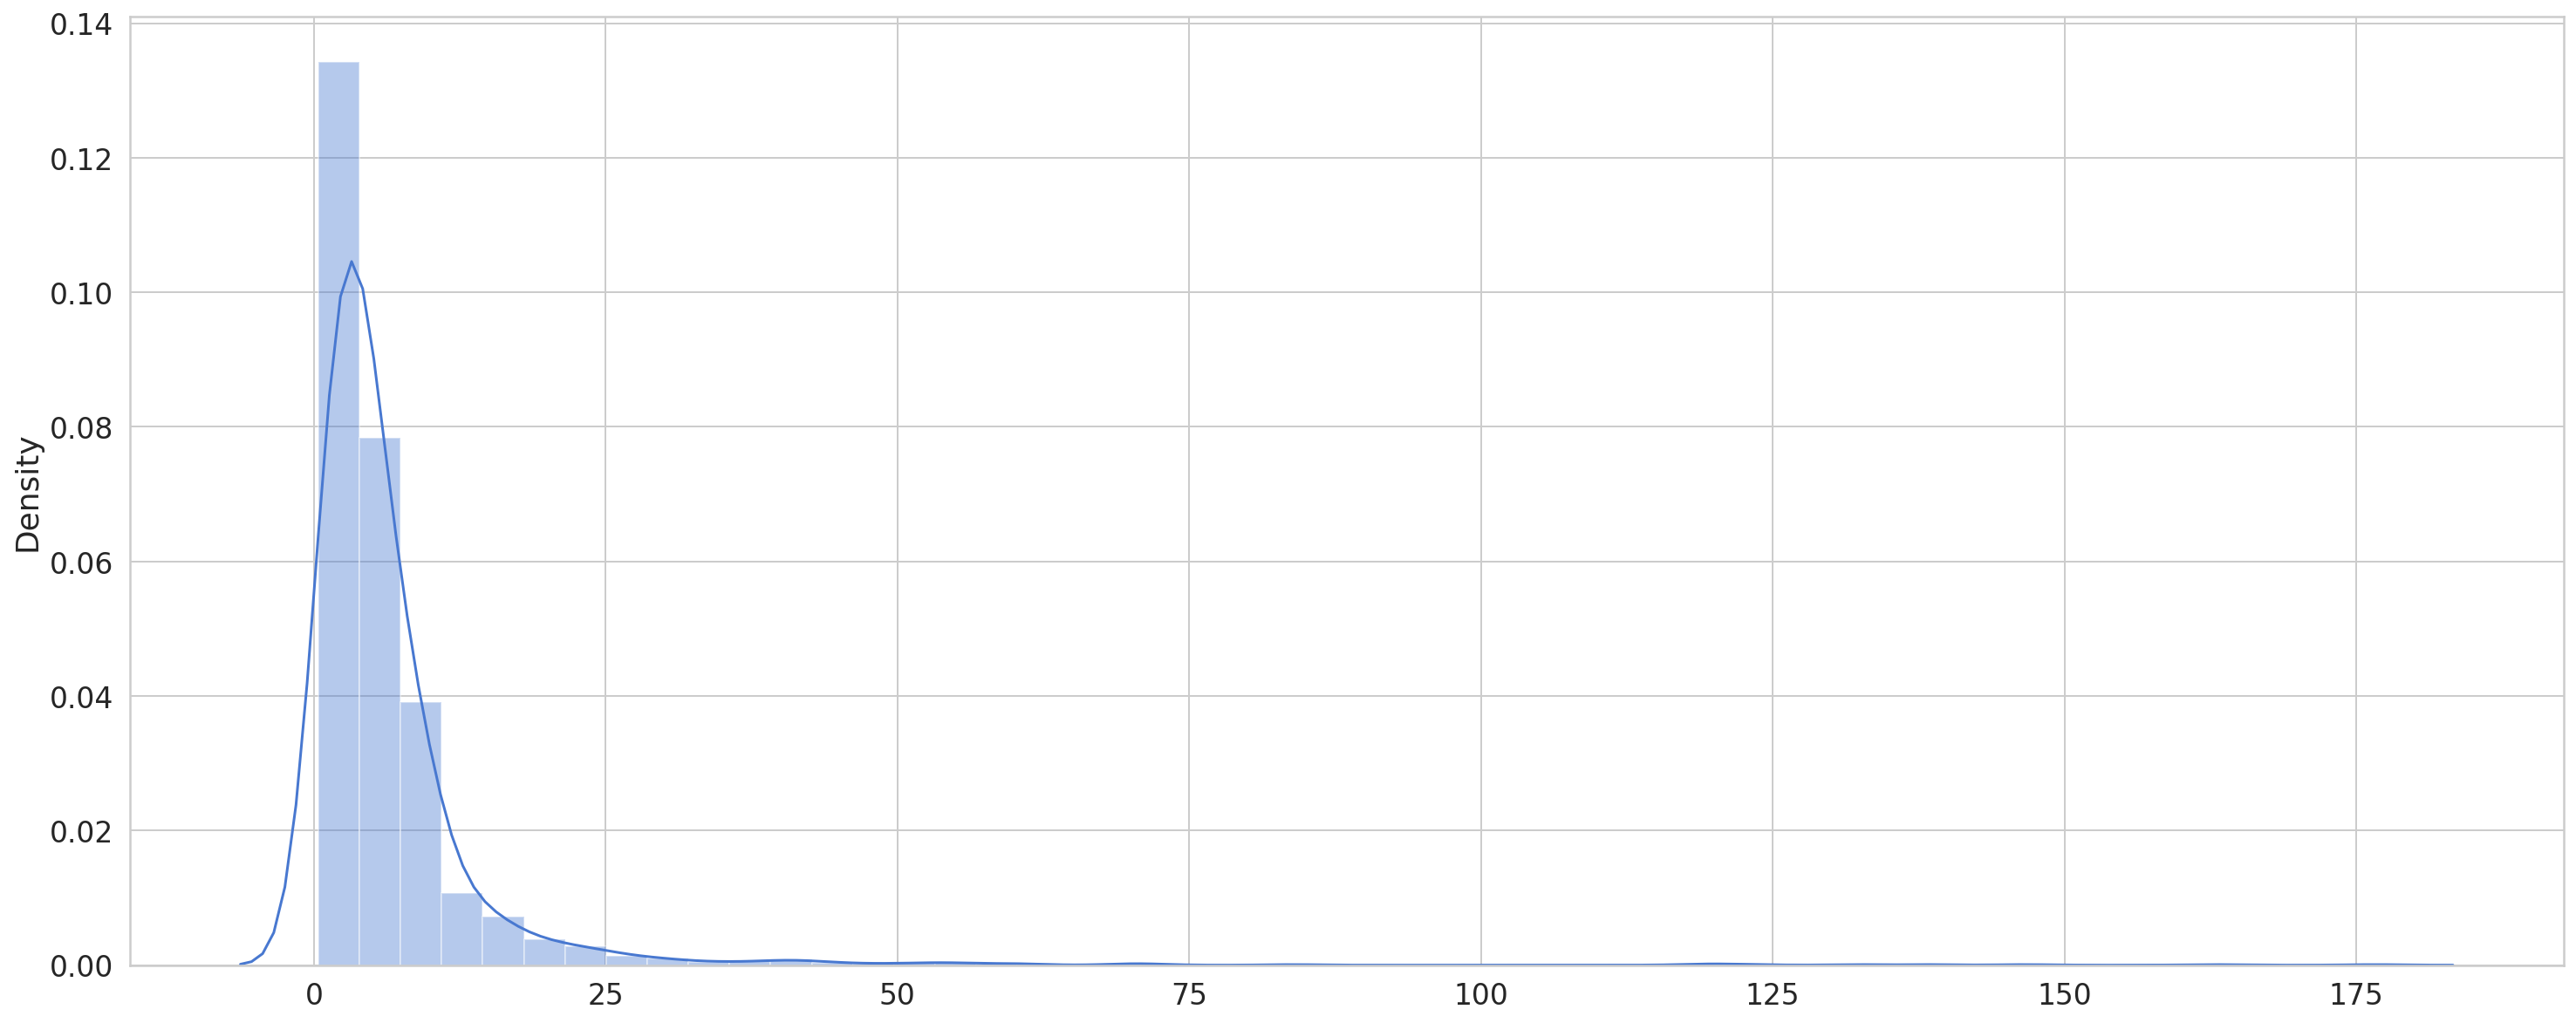

In [ ]:
X_test_predfreq1 = model.predict(X_test1)

test_mae_lossfreq1 = np.mean(np.abs(X_test_predfreq1 - X_test1), axis=1)

plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1, bins=50, kde=True);

In [ ]:
predictfreq1 = X_test_predfreq1[:,0]
test_predfreq1 = pd.DataFrame(index=test1freqtotale[TIME_STEPS:].index)
test_predfreq1['pred'] = scaler.inverse_transform(predictfreq1)
test_predfreq1


pred
created_at                            
2021-04-30 19:50:00+00:00  1413.856079
2021-04-30 20:00:00+00:00  1392.936035
2021-04-30 20:10:00+00:00  1454.883423
2021-04-30 20:20:00+00:00  1434.567139
2021-04-30 20:30:00+00:00  1490.367188
...                                ...
2021-05-24 23:20:00+00:00  1052.040405
2021-05-24 23:30:00+00:00  1102.626465
2021-05-24 23:40:00+00:00  1088.397461
2021-05-25 11:40:00+00:00   538.603821
2021-05-25 19:40:00+00:00   552.173828

[2401 rows x 1 columns]

In [ ]:
#plot données réelles vs données prédites

import plotly.express as px


fig = px.line(test1freqtotale, x=test1freqtotale[TIME_STEPS:].index, y=scaler.inverse_transform(test1freqtotale[TIME_STEPS:].freqtotale),title="data vs pred")

fig.add_scatter(x=test_predfreq1.index, y=test_predfreq1[TIME_STEPS:].pred, mode='lines',name="pred1",marker_color='rgba(255, 0, 0, .9)')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [ ]:
threshold = []
tpr=[]
fpr=[]
tab_auc = pd.DataFrame({"threshold": threshold,
                                "tpr":tpr,
                                "fpr":fpr })
tab_auc

Empty DataFrame
Columns: [threshold, tpr, fpr]
Index: []

In [ ]:
THRESHOLD = 1
test_score_dffreq1 = pd.DataFrame(index=test1freqtotale[TIME_STEPS:].index)
test_score_dffreq1['loss'] = test_mae_lossfreq1
test_score_dffreq1['threshold'] = THRESHOLD
test_score_dffreq1['anomaly'] = test_score_dffreq1.loss > test_score_dffreq1.threshold
test_score_dffreq1['nbtweet'] = test1freqtotale[TIME_STEPS:].freqtotale
test_score_dffreq1

loss  threshold  anomaly    nbtweet
created_at                                                         
2021-04-30 19:50:00+00:00   7.413373          7     True  73.430518
2021-04-30 20:00:00+00:00   0.989171          7    False  76.954195
2021-04-30 20:10:00+00:00   2.128255          7    False  75.672857
2021-04-30 20:20:00+00:00   1.373031          7    False  78.609255
2021-04-30 20:30:00+00:00   2.807974          7    False  74.978800
...                              ...        ...      ...        ...
2021-05-24 23:20:00+00:00   8.312503          7     True  59.549366
2021-05-24 23:30:00+00:00   3.713952          7    False  57.734139
2021-05-24 23:40:00+00:00   2.252165          7    False  17.585579
2021-05-25 11:40:00+00:00  26.946312          7     True  26.448160
2021-05-25 19:40:00+00:00  20.677338          7     True  26.448160

[2401 rows x 4 columns]

In [ ]:
# plot des écarts avec le seuil

import plotly.express as px


fig = px.bar(test_score_dffreq1, x=test_score_dffreq1.index, y="loss")
fig.add_scatter(x=test_score_dffreq1.index, y=test_score_dffreq1['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1.index, y=test_score_dffreq1['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1 = test_score_dffreq1[test_score_dffreq1.anomaly == True]
anomaliesfreq1['nbtweet'] = scaler.inverse_transform(anomaliesfreq1['nbtweet'])
anomaliesfreq1.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



loss  threshold  anomaly  nbtweet
created_at                                                      
2021-04-30 23:50:00+00:00  9.069606          7     True   1022.0
2021-05-01 00:40:00+00:00  7.498669          7     True    715.0

In [ ]:
#plot des anomalies détectées sur les données réélles 

import plotly.express as px

fig = px.line(test1freqtotale, x=test1freqtotale[TIME_STEPS:].index, y=scaler.inverse_transform(test1freqtotale[TIME_STEPS:].freqtotale) )
fig.add_scatter(x=anomaliesfreq1.index, y=anomaliesfreq1.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()




#seuillage : choix de la valeur du seuil

In [ ]:
import more_itertools as mit


for x in mit.numeric_range(0, 176, 1):
    
    test_score_dffreq1 = pd.DataFrame(index=test1freqtotale[TIME_STEPS:].index)
    test_score_dffreq1['loss'] = test_mae_lossfreq1
    test_score_dffreq1['threshold'] = x
    test_score_dffreq1['anomaly'] = test_score_dffreq1.loss > test_score_dffreq1.threshold
    test_score_dffreq1['nbtweet'] = test1freqtotale[TIME_STEPS:].freqtotale
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(df['anomaly'][5:],test_score_dffreq1['anomaly'])
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]
    TN = confusion_matrix[0][0]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    tab_auc.loc[len(tab_auc.index)] = [x, TPR,FPR] 




In [ ]:
tab_auc

threshold       tpr       fpr
0          0.0  1.000000  1.000000
1          1.0  1.000000  0.955518
2          2.0  0.936508  0.792558
3          3.0  0.825397  0.633875
4          4.0  0.777778  0.502994
..         ...       ...       ...
171      171.0  0.000000  0.000428
172      172.0  0.000000  0.000428
173      173.0  0.000000  0.000428
174      174.0  0.000000  0.000428
175      175.0  0.000000  0.000428

[176 rows x 3 columns]

In [ ]:
tab_auc.to_csv("tab_auc_mai.csv",sep=";")
files.download('tab_auc_mai.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No handles with labels found to put in legend.


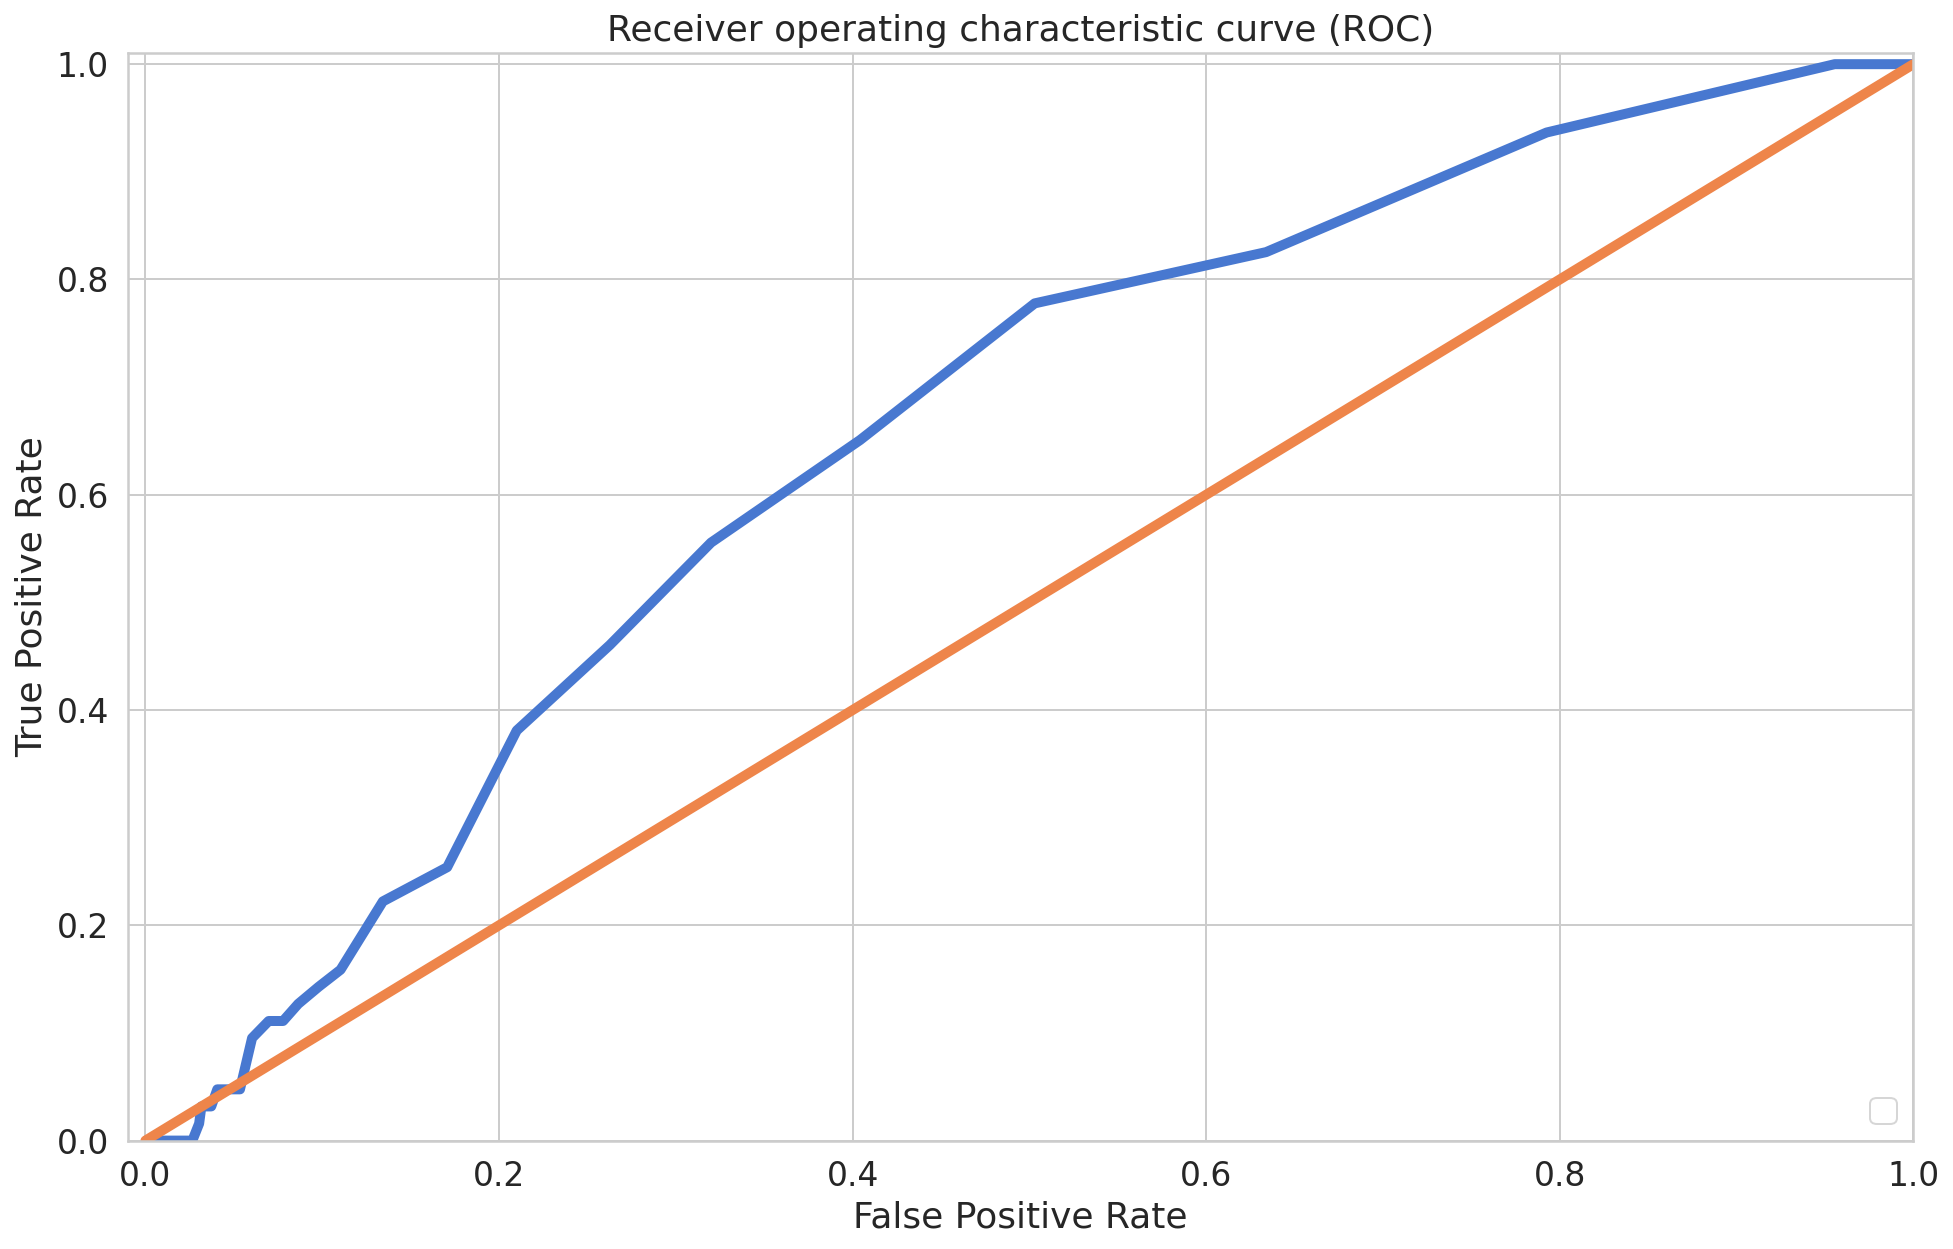

In [ ]:
#plot courbe roc
plt.plot(tab_auc['fpr'], tab_auc['tpr'], linewidth=5)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# attaque

In [ ]:
history = model.fit(
    X_train1attaque, y_train1attaque, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/20
78/78 [==============================] - 1s 7ms/step - loss: 1.3065 - val_loss: 0.8163
Epoch 2/20
78/78 [==============================] - 1s 7ms/step - loss: 0.8859 - val_loss: 0.7543
Epoch 3/20
78/78 [==============================] - 1s 7ms/step - loss: 0.8062 - val_loss: 0.6894
Epoch 4/20
78/78 [==============================] - 0s 6ms/step - loss: 0.7795 - val_loss: 0.6828
Epoch 5/20
78/78 [==============================] - 1s 7ms/step - loss: 0.7455 - val_loss: 0.6473
Epoch 6/20
78/78 [==============================] - 1s 7ms/step - loss: 0.7315 - val_loss: 0.6378
Epoch 7/20
78/78 [==============================] - 1s 7ms/step - loss: 0.7158 - val_loss: 0.6798
Epoch 8/20
78/78 [==============================] - 1s 7ms/step - loss: 0.6965 - val_loss: 0.6199
Epoch 9/20
78/78 [==============================] - 1s 7ms/step - loss: 0.7025 - val_loss: 0.6162
Epoch 10/20
78/78 [==============================] - 1s 7ms/step - loss: 0.6802 - val_loss: 0.6119
Epoch 11/20
78/78 [

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



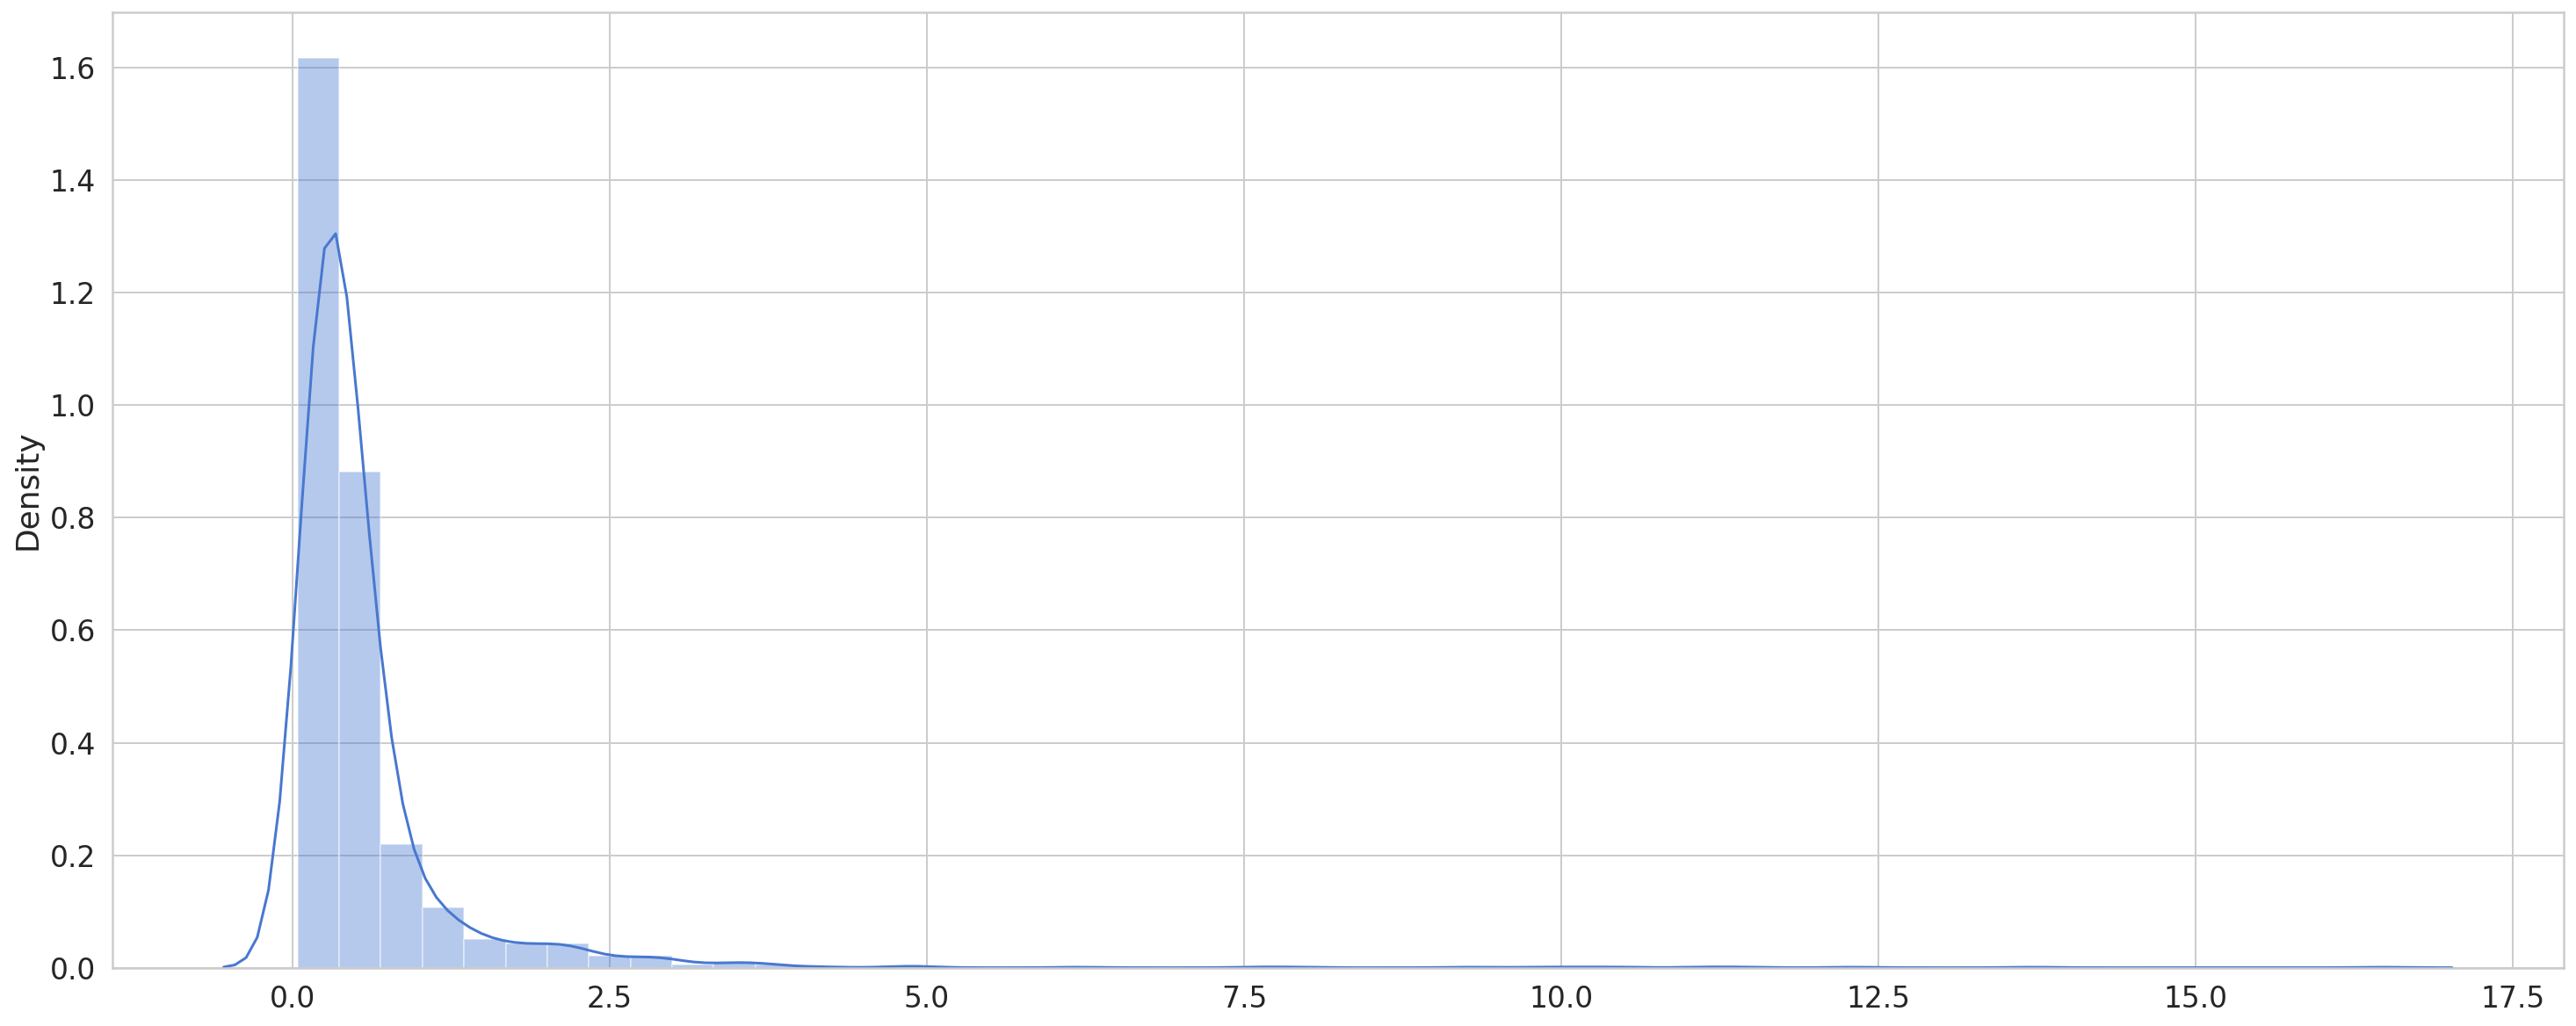

In [ ]:
X_test_predfreq1attaque = model.predict(X_test1attaque)


test_mae_lossfreq1attaque = np.mean(np.abs(X_test_predfreq1attaque - X_test1attaque), axis=1)

plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1attaque, bins=50, kde=True);

In [ ]:
predictfreq1attaque = X_test_predfreq1attaque[:,0]
test_predfreq1attaque = pd.DataFrame(index=test1attaque[TIME_STEPS:].index)
test_predfreq1attaque['pred'] = scaler.inverse_transform(predictfreq1attaque)

test_predfreq1attaque

pred
created_at                          
2021-04-30 22:50:00+00:00  82.529533
2021-04-30 23:00:00+00:00  78.571526
2021-04-30 23:10:00+00:00  78.458252
2021-04-30 23:20:00+00:00  88.272705
2021-04-30 23:30:00+00:00  72.951088
...                              ...
2021-05-24 23:20:00+00:00  49.742996
2021-05-24 23:30:00+00:00  50.513100
2021-05-24 23:40:00+00:00  45.833183
2021-05-25 11:40:00+00:00  38.914406
2021-05-25 19:40:00+00:00  35.511749

[2383 rows x 1 columns]

In [ ]:


import plotly.express as px


fig = px.line(test1attaque, x=test1attaque[TIME_STEPS:].index, y=scaler.inverse_transform(test1attaque[TIME_STEPS:].attaque),title="data vs pred")

fig.add_scatter(x=test_predfreq1attaque.index, y=test_predfreq1attaque[TIME_STEPS:].pred, mode='lines',name="pred1",marker_color='rgba(255, 0, 0, .9)')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [ ]:
THRESHOLD = 0.8

test_score_dffreq1attaque = pd.DataFrame(index=test1attaque[TIME_STEPS:].index)
test_score_dffreq1attaque['loss'] = test_mae_lossfreq1attaque
test_score_dffreq1attaque['threshold'] = THRESHOLD
test_score_dffreq1attaque['anomaly'] = test_score_dffreq1attaque.loss > test_score_dffreq1attaque.threshold
test_score_dffreq1attaque['nbtweet'] = test1attaque[TIME_STEPS:].attaque

test_score_dffreq1attaque

loss  threshold  anomaly   nbtweet
created_at                                                       
2021-04-30 22:50:00+00:00  0.933661        0.8     True  3.555735
2021-04-30 23:00:00+00:00  0.734864        0.8    False  3.769939
2021-04-30 23:10:00+00:00  0.642167        0.8    False  4.787410
2021-04-30 23:20:00+00:00  0.557478        0.8    False  2.698917
2021-04-30 23:30:00+00:00  0.736364        0.8    False  3.448633
...                             ...        ...      ...       ...
2021-05-24 23:20:00+00:00  0.315756        0.8    False  2.002753
2021-05-24 23:30:00+00:00  0.323145        0.8    False  1.360140
2021-05-24 23:40:00+00:00  0.272390        0.8    False  0.128465
2021-05-25 11:40:00+00:00  0.651612        0.8    False -0.246393
2021-05-25 19:40:00+00:00  0.884126        0.8     True  0.074914

[2383 rows x 4 columns]

In [ ]:


import plotly.express as px


fig = px.bar(test_score_dffreq1attaque, x=test_score_dffreq1attaque.index, y="loss")
fig.add_scatter(x=test_score_dffreq1attaque.index, y=test_score_dffreq1attaque['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1attaque.index, y=test_score_dffreq1attaque['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1attaque = test_score_dffreq1attaque[test_score_dffreq1attaque.anomaly == True]
anomaliesfreq1attaque['nbtweet'] = scaler.inverse_transform(anomaliesfreq1attaque['nbtweet'])

anomaliesfreq1attaque.head(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



loss  threshold  anomaly  nbtweet
created_at                                                      
2021-04-30 22:50:00+00:00  0.933661        0.8     True     83.0
2021-05-01 12:30:00+00:00  2.747447        0.8     True    173.0

In [ ]:


import plotly.express as px

fig = px.line(test1attaque, x=test1attaque[TIME_STEPS:].index, y=scaler.inverse_transform(test1attaque[TIME_STEPS:].attaque) )
fig.add_scatter(x=anomaliesfreq1attaque.index, y=anomaliesfreq1attaque.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()




#incendie

In [ ]:
history = model.fit(
    X_train1incendie, y_train1incendie, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3969 - val_loss: 0.2243
Epoch 2/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3826 - val_loss: 0.2075
Epoch 3/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3793 - val_loss: 0.1962
Epoch 4/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3840 - val_loss: 0.1894
Epoch 5/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3778 - val_loss: 0.1995
Epoch 6/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3784 - val_loss: 0.1917
Epoch 7/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3823 - val_loss: 0.1917
Epoch 8/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3774 - val_loss: 0.2081
Epoch 9/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3757 - val_loss: 0.1939
Epoch 10/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3718 - val_loss: 0.1911
Epoch 11/20
78/78 [

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



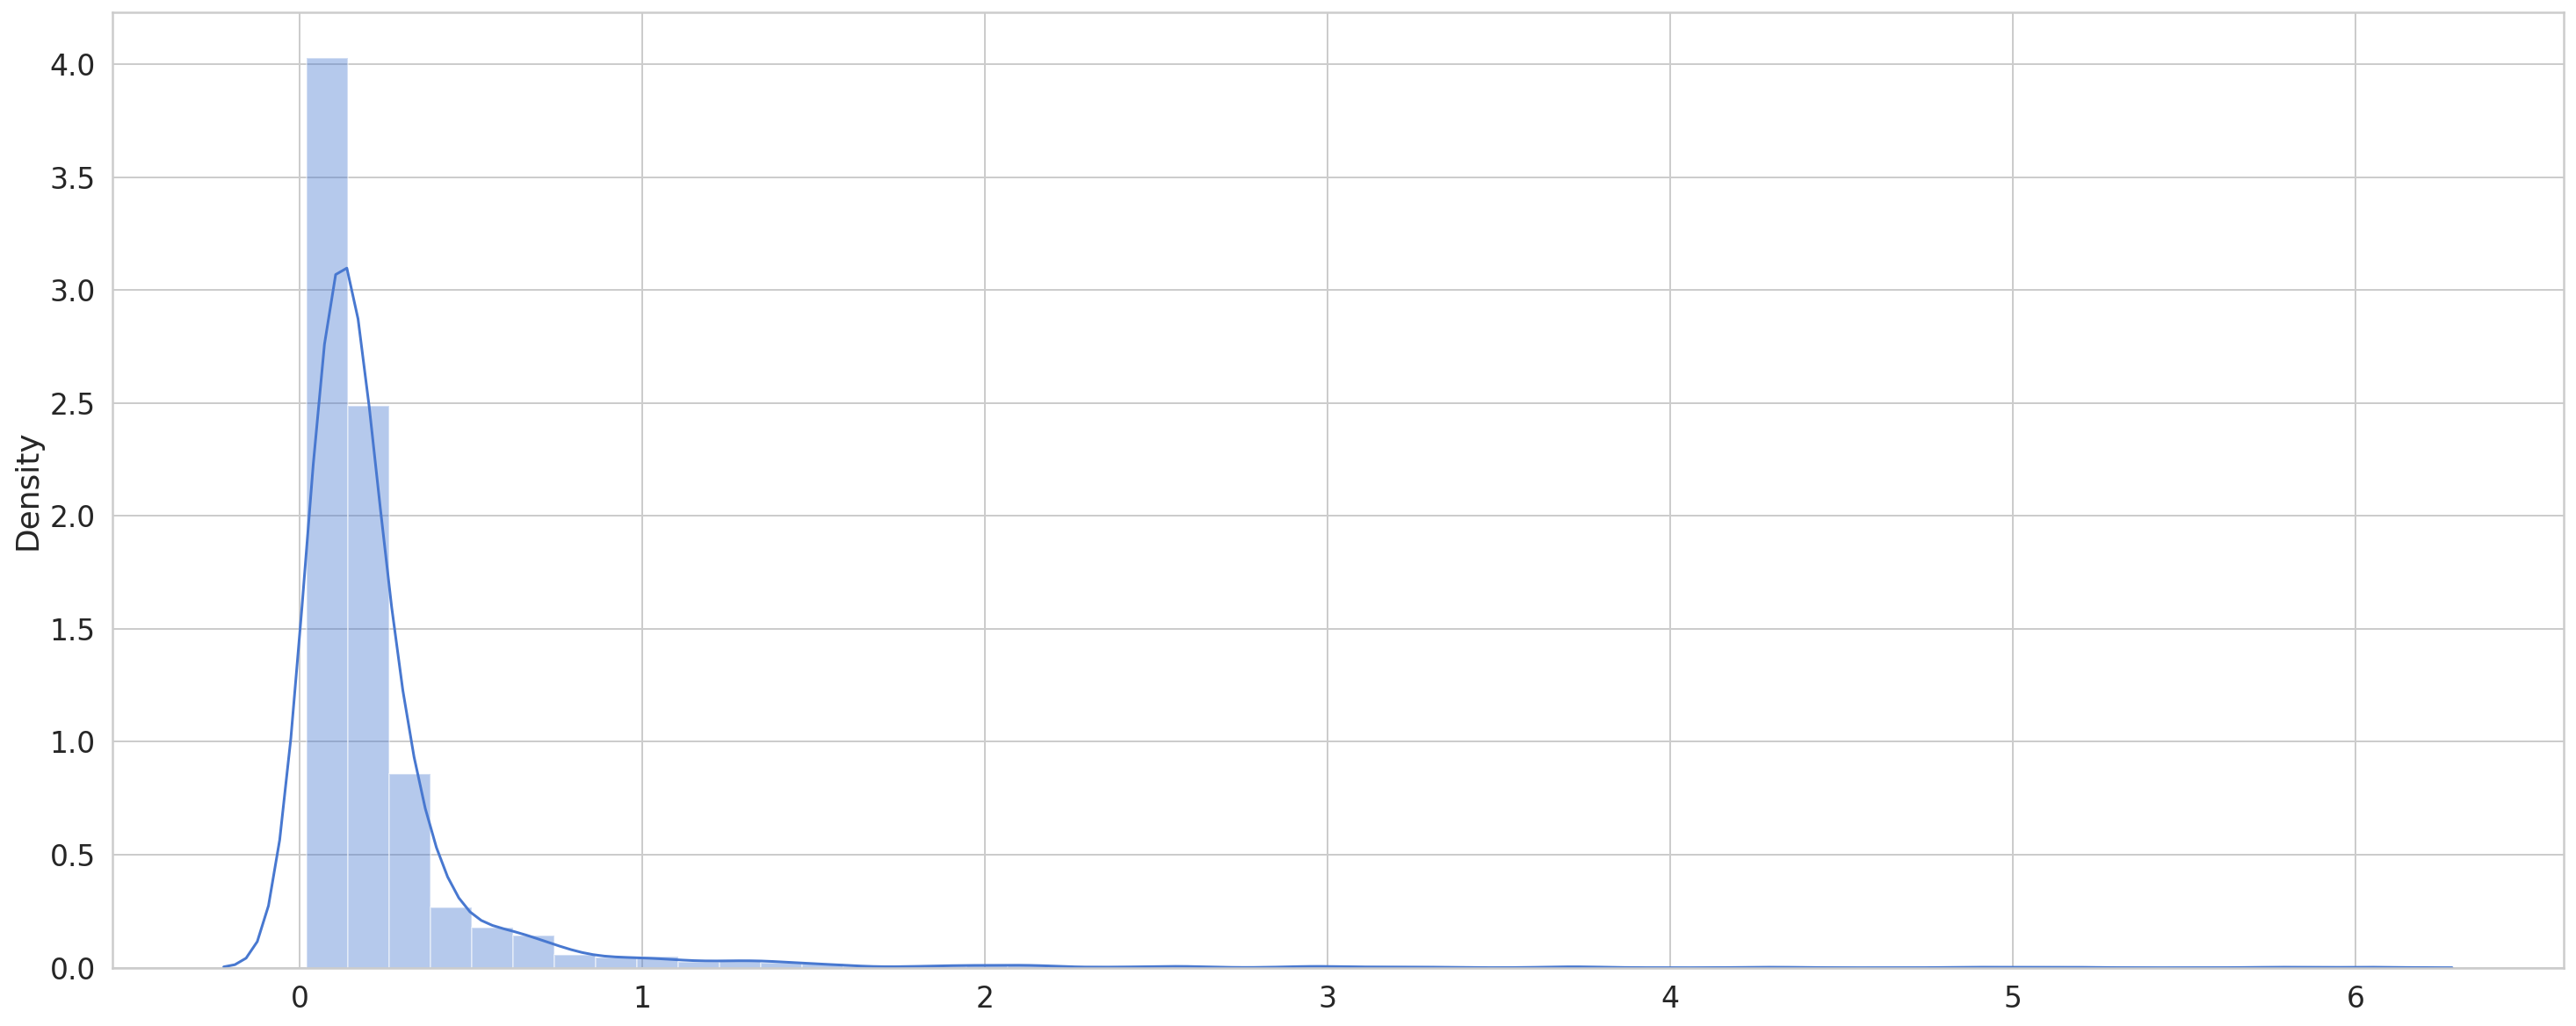

In [ ]:
X_test_predfreq1incendie = model.predict(X_test1incendie)


test_mae_lossfreq1incendie = np.mean(np.abs(X_test_predfreq1incendie - X_test1incendie), axis=1)

plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1incendie, bins=50, kde=True);

In [ ]:
predictfreq1incendie = X_test_predfreq1incendie[:,0]
test_predfreq1incendie = pd.DataFrame(index=test1incendie[TIME_STEPS:].index)
test_predfreq1incendie['pred'] = scaler.inverse_transform(predictfreq1incendie)
test_predfreq1incendie


pred
created_at                         
2021-04-30 22:50:00+00:00  9.538445
2021-04-30 23:00:00+00:00  6.417759
2021-04-30 23:10:00+00:00  6.551173
2021-04-30 23:20:00+00:00  8.354480
2021-04-30 23:30:00+00:00  8.097813
...                             ...
2021-05-24 23:20:00+00:00  6.151510
2021-05-24 23:30:00+00:00  4.178131
2021-05-24 23:40:00+00:00  5.717076
2021-05-25 11:40:00+00:00  4.066408
2021-05-25 19:40:00+00:00  4.559936

[2383 rows x 1 columns]

In [ ]:


import plotly.express as px


fig = px.line(test1incendie, x=test1incendie[TIME_STEPS:].index, y=scaler.inverse_transform(test1incendie[TIME_STEPS:].incendie),title="data vs pred")

fig.add_scatter(x=test_predfreq1incendie.index, y=test_predfreq1incendie[TIME_STEPS:].pred, mode='lines',name="pred1",marker_color='rgba(255, 0, 0, .9)')
#fig.add_scatter(x=test_predfreq2.index, y=test_predfreq2[TIME_STEPS:].pred, mode='lines',name="pred2",marker_color='rgba(255, 15, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [ ]:
THRESHOLD = 0.3

test_score_dffreq1incendie = pd.DataFrame(index=test1incendie[TIME_STEPS:].index)
test_score_dffreq1incendie['loss'] = test_mae_lossfreq1incendie
test_score_dffreq1incendie['threshold'] = THRESHOLD
test_score_dffreq1incendie['anomaly'] = test_score_dffreq1incendie.loss > test_score_dffreq1incendie.threshold
test_score_dffreq1incendie['nbtweet'] = test1incendie[TIME_STEPS:].incendie
test_score_dffreq1incendie


loss  threshold  anomaly   nbtweet
created_at                                                       
2021-04-30 22:50:00+00:00  0.208145        0.3    False -0.728353
2021-04-30 23:00:00+00:00  0.152640        0.3    False -0.567700
2021-04-30 23:10:00+00:00  0.157688        0.3    False -0.353495
2021-04-30 23:20:00+00:00  0.167666        0.3    False -0.460597
2021-04-30 23:30:00+00:00  0.158527        0.3    False -0.460597
...                             ...        ...      ...       ...
2021-05-24 23:20:00+00:00  0.168077        0.3    False -0.781904
2021-05-24 23:30:00+00:00  0.134761        0.3    False -0.460597
2021-05-24 23:40:00+00:00  0.138754        0.3    False -0.835455
2021-05-25 11:40:00+00:00  0.176537        0.3    False -0.674802
2021-05-25 19:40:00+00:00  0.146960        0.3    False -0.674802

[2383 rows x 4 columns]

In [ ]:


import plotly.express as px


fig = px.bar(test_score_dffreq1incendie, x=test_score_dffreq1incendie.index, y="loss")
fig.add_scatter(x=test_score_dffreq1incendie.index, y=test_score_dffreq1incendie['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1incendie.index, y=test_score_dffreq1incendie['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1incendie = test_score_dffreq1incendie[test_score_dffreq1incendie.anomaly == True]
anomaliesfreq1incendie['nbtweet'] = scaler.inverse_transform(anomaliesfreq1incendie['nbtweet'])
anomaliesfreq1incendie.head(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



loss  threshold  anomaly  nbtweet
created_at                                                      
2021-05-01 09:00:00+00:00  0.314641        0.3     True     12.0
2021-05-01 15:40:00+00:00  0.331530        0.3     True      4.0

In [ ]:


import plotly.express as px

fig = px.line(test1incendie, x=test1incendie[TIME_STEPS:].index, y=scaler.inverse_transform(test1incendie[TIME_STEPS:].incendie) )
fig.add_scatter(x=anomaliesfreq1incendie.index, y=anomaliesfreq1incendie.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()




# accident

In [ ]:
history = model.fit(
    X_train1accident, y_train1accident, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3298 - val_loss: 0.2234
Epoch 2/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3245 - val_loss: 0.2345
Epoch 3/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3290 - val_loss: 0.2212
Epoch 4/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3265 - val_loss: 0.2217
Epoch 5/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3221 - val_loss: 0.2274
Epoch 6/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3226 - val_loss: 0.2224
Epoch 7/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3234 - val_loss: 0.2302
Epoch 8/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3236 - val_loss: 0.2242
Epoch 9/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3197 - val_loss: 0.2231
Epoch 10/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3231 - val_loss: 0.2222
Epoch 11/20
78/78 [

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



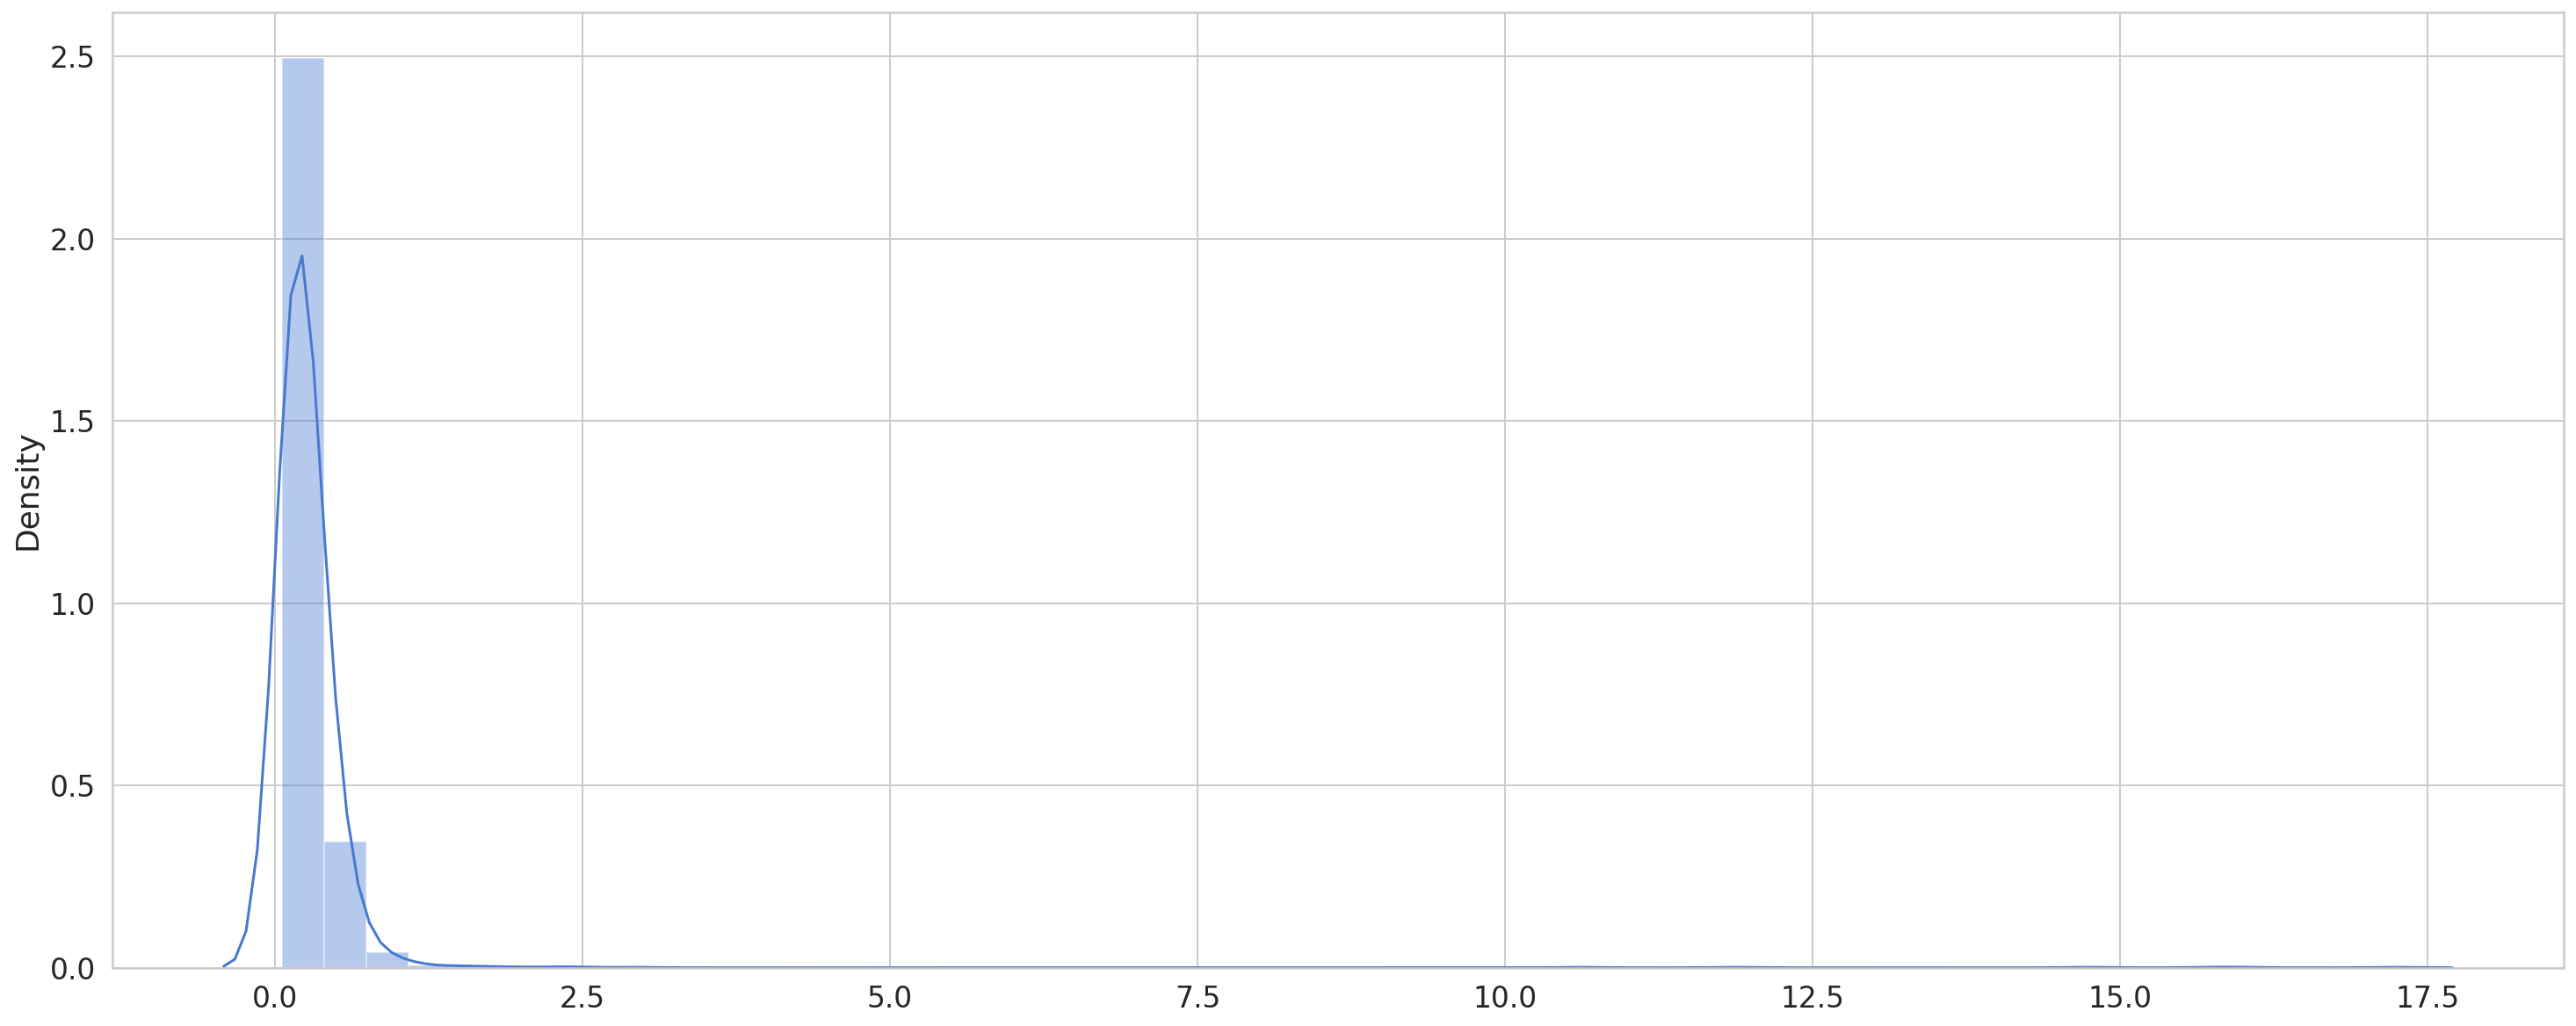

In [ ]:
X_test_predfreq1accident = model.predict(X_test1accident)

test_mae_lossfreq1accident = np.mean(np.abs(X_test_predfreq1accident - X_test1accident), axis=1)

plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1accident, bins=50, kde=True);

In [ ]:
predictfreq1accident = X_test_predfreq1accident[:,0]
test_predfreq1accident = pd.DataFrame(index=test1accident[TIME_STEPS:].index)
test_predfreq1accident['pred'] = scaler.inverse_transform(predictfreq1accident)
test_predfreq1accident


pred
created_at                          
2021-04-30 22:50:00+00:00  32.174103
2021-04-30 23:00:00+00:00  27.357077
2021-04-30 23:10:00+00:00  30.095272
2021-04-30 23:20:00+00:00  27.557405
2021-04-30 23:30:00+00:00  23.998831
...                              ...
2021-05-24 23:20:00+00:00  24.035566
2021-05-24 23:30:00+00:00  22.169109
2021-05-24 23:40:00+00:00  18.809565
2021-05-25 11:40:00+00:00  14.116224
2021-05-25 19:40:00+00:00  13.585735

[2383 rows x 1 columns]

In [ ]:


import plotly.express as px


fig = px.line(test1accident, x=test1accident[TIME_STEPS:].index, y=scaler.inverse_transform(test1accident[TIME_STEPS:].accident),title="data vs pred")

fig.add_scatter(x=test_predfreq1accident.index, y=test_predfreq1accident[TIME_STEPS:].pred, mode='lines',name="pred1",marker_color='rgba(255, 0, 0, .9)')
#fig.add_scatter(x=test_predfreq2.index, y=test_predfreq2[TIME_STEPS:].pred, mode='lines',name="pred2",marker_color='rgba(255, 15, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [ ]:
THRESHOLD = 0.3

test_score_dffreq1accident = pd.DataFrame(index=test1accident[TIME_STEPS:].index)
test_score_dffreq1accident['loss'] = test_mae_lossfreq1accident
test_score_dffreq1accident['threshold'] = THRESHOLD
test_score_dffreq1accident['anomaly'] = test_score_dffreq1accident.loss > test_score_dffreq1accident.threshold
test_score_dffreq1accident['nbtweet'] = test1accident[TIME_STEPS:].accident
test_score_dffreq1accident



loss  threshold  anomaly   nbtweet
created_at                                                       
2021-04-30 22:50:00+00:00  0.373005        0.3     True  0.235567
2021-04-30 23:00:00+00:00  0.396386        0.3     True  0.985282
2021-04-30 23:10:00+00:00  0.311573        0.3     True  0.556873
2021-04-30 23:20:00+00:00  0.358327        0.3     True  0.289118
2021-04-30 23:30:00+00:00  0.267633        0.3    False  0.342669
...                             ...        ...      ...       ...
2021-05-24 23:20:00+00:00  0.133741        0.3    False  0.235567
2021-05-24 23:30:00+00:00  0.181210        0.3    False -0.032189
2021-05-24 23:40:00+00:00  0.236228        0.3    False -0.460597
2021-05-25 11:40:00+00:00  0.366047        0.3     True -0.192842
2021-05-25 19:40:00+00:00  0.294811        0.3    False -0.407046

[2383 rows x 4 columns]

In [ ]:


import plotly.express as px


fig = px.bar(test_score_dffreq1accident, x=test_score_dffreq1accident.index, y="loss")
fig.add_scatter(x=test_score_dffreq1accident.index, y=test_score_dffreq1accident['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1accident.index, y=test_score_dffreq1accident['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1accident = test_score_dffreq1accident[test_score_dffreq1accident.anomaly == True]
anomaliesfreq1accident['nbtweet'] = scaler.inverse_transform(anomaliesfreq1accident['nbtweet'])
anomaliesfreq1accident.head(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



loss  threshold  anomaly  nbtweet
created_at                                                      
2021-04-30 22:50:00+00:00  0.373005        0.3     True     21.0
2021-04-30 23:00:00+00:00  0.396386        0.3     True     35.0

In [ ]:


import plotly.express as px

fig = px.line(test1accident, x=test1accident[TIME_STEPS:].index, y=scaler.inverse_transform(test1accident[TIME_STEPS:].accident) )
fig.add_scatter(x=anomaliesfreq1accident.index, y=anomaliesfreq1accident.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()




# secours

In [ ]:
history = model.fit(
    X_train1secours, y_train1secours, 
    epochs=10, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2962 - val_loss: 0.1821
Epoch 2/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2886 - val_loss: 0.1839
Epoch 3/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2915 - val_loss: 0.1837
Epoch 4/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2917 - val_loss: 0.1826
Epoch 5/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2898 - val_loss: 0.1851
Epoch 6/10
78/78 [==============================] - 1s 6ms/step - loss: 0.2893 - val_loss: 0.1825
Epoch 7/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2917 - val_loss: 0.1888
Epoch 8/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2866 - val_loss: 0.1889
Epoch 9/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2856 - val_loss: 0.1841
Epoch 10/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2836 - val_loss: 0.2015


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



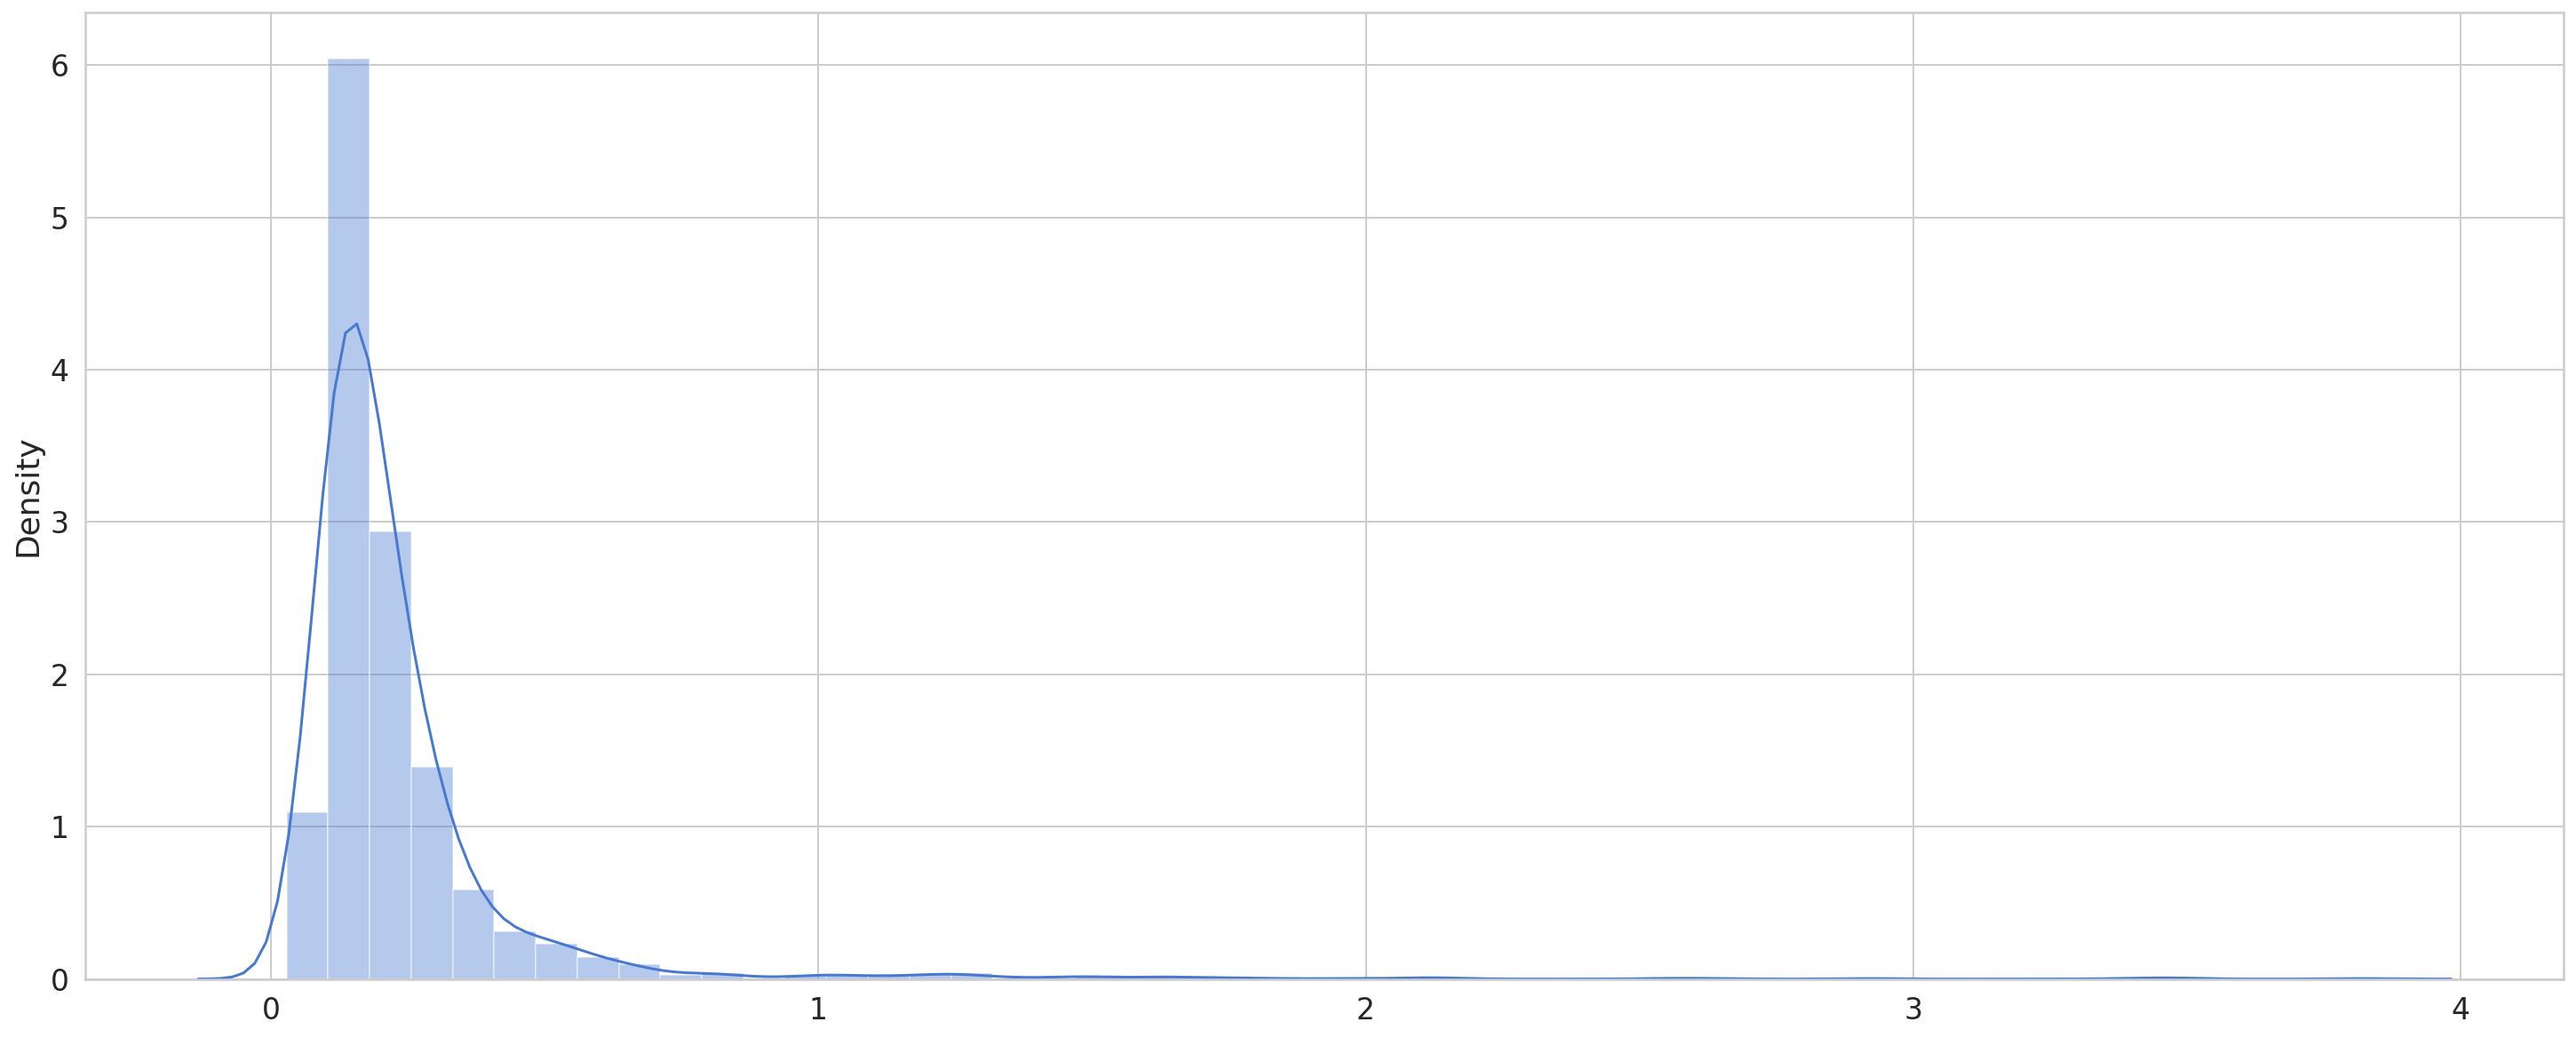

In [ ]:
X_test_predfreq1secours = model.predict(X_test1secours)


test_mae_lossfreq1secours = np.mean(np.abs(X_test_predfreq1secours- X_test1secours), axis=1)


plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1secours, bins=50, kde=True);

In [ ]:
predictfreq1secours = X_test_predfreq1secours[:,0]
test_predfreq1secours = pd.DataFrame(index=test1secours[TIME_STEPS:].index)
test_predfreq1secours['pred'] = scaler.inverse_transform(predictfreq1secours)
test_predfreq1secours


pred
created_at                          
2021-04-30 22:50:00+00:00  13.108436
2021-04-30 23:00:00+00:00  11.245523
2021-04-30 23:10:00+00:00  12.520843
2021-04-30 23:20:00+00:00  12.199351
2021-04-30 23:30:00+00:00  13.173802
...                              ...
2021-05-24 23:20:00+00:00  23.574526
2021-05-24 23:30:00+00:00  22.712746
2021-05-24 23:40:00+00:00  18.868738
2021-05-25 11:40:00+00:00  14.575987
2021-05-25 19:40:00+00:00  12.536741

[2383 rows x 1 columns]

In [ ]:


import plotly.express as px


fig = px.line(test1secours, x=test1secours[TIME_STEPS:].index, y=scaler.inverse_transform(test1secours[TIME_STEPS:].secours),title="data vs pred")

fig.add_scatter(x=test_predfreq1secours.index, y=test_predfreq1secours[TIME_STEPS:].pred, mode='lines',name="pred1",marker_color='rgba(255, 0, 0, .9)')
#fig.add_scatter(x=test_predfreq2.index, y=test_predfreq2[TIME_STEPS:].pred, mode='lines',name="pred2",marker_color='rgba(255, 15, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [ ]:
THRESHOLD = 0.25

test_score_dffreq1secours = pd.DataFrame(index=test1secours[TIME_STEPS:].index)
test_score_dffreq1secours['loss'] = test_mae_lossfreq1secours
test_score_dffreq1secours['threshold'] = THRESHOLD
test_score_dffreq1secours['anomaly'] = test_score_dffreq1secours.loss > test_score_dffreq1secours.threshold
test_score_dffreq1secours['nbtweet'] = test1secours[TIME_STEPS:].secours
test_score_dffreq1secours



loss  threshold  anomaly   nbtweet
created_at                                                       
2021-04-30 22:50:00+00:00  0.141659       0.25    False -0.460597
2021-04-30 23:00:00+00:00  0.133847       0.25    False -0.192842
2021-04-30 23:10:00+00:00  0.114428       0.25    False -0.299944
2021-04-30 23:20:00+00:00  0.122510       0.25    False -0.139291
2021-04-30 23:30:00+00:00  0.120716       0.25    False -0.085740
...                             ...        ...      ...       ...
2021-05-24 23:20:00+00:00  0.147404       0.25    False  0.396220
2021-05-24 23:30:00+00:00  0.119802       0.25    False -0.246393
2021-05-24 23:40:00+00:00  0.276547       0.25     True -0.728353
2021-05-25 11:40:00+00:00  0.436450       0.25     True -0.621251
2021-05-25 19:40:00+00:00  0.469705       0.25     True -0.460597

[2383 rows x 4 columns]

In [ ]:


import plotly.express as px


fig = px.bar(test_score_dffreq1secours, x=test_score_dffreq1secours.index, y="loss")
fig.add_scatter(x=test_score_dffreq1secours.index, y=test_score_dffreq1secours['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1secours.index, y=test_score_dffreq1secours['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1secours = test_score_dffreq1secours[test_score_dffreq1secours.anomaly == True]
anomaliesfreq1secours['nbtweet'] = scaler.inverse_transform(anomaliesfreq1secours['nbtweet'])
anomaliesfreq1secours.head(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



loss  threshold  anomaly  nbtweet
created_at                                                      
2021-05-01 05:00:00+00:00  0.791993       0.25     True     19.0
2021-05-01 05:10:00+00:00  0.660285       0.25     True     12.0

In [ ]:


import plotly.express as px

fig = px.line(test1secours, x=test1secours[TIME_STEPS:].index, y=scaler.inverse_transform(test1secours[TIME_STEPS:].secours) )
fig.add_scatter(x=anomaliesfreq1secours.index, y=anomaliesfreq1secours.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()




# agression

In [ ]:
history = model.fit(
    X_train1agression, y_train1agression, 
    epochs=10, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/10
78/78 [==============================] - 4s 14ms/step - loss: 0.3516 - val_loss: 0.4856
Epoch 2/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2639 - val_loss: 0.4626
Epoch 3/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2561 - val_loss: 0.4546
Epoch 4/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2494 - val_loss: 0.4530
Epoch 5/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2488 - val_loss: 0.4321
Epoch 6/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2445 - val_loss: 0.4319
Epoch 7/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2455 - val_loss: 0.4310
Epoch 8/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2467 - val_loss: 0.4327
Epoch 9/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2449 - val_loss: 0.4390
Epoch 10/10
78/78 [==============================] - 1s 7ms/step - loss: 0.2433 - val_loss: 0.4399


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


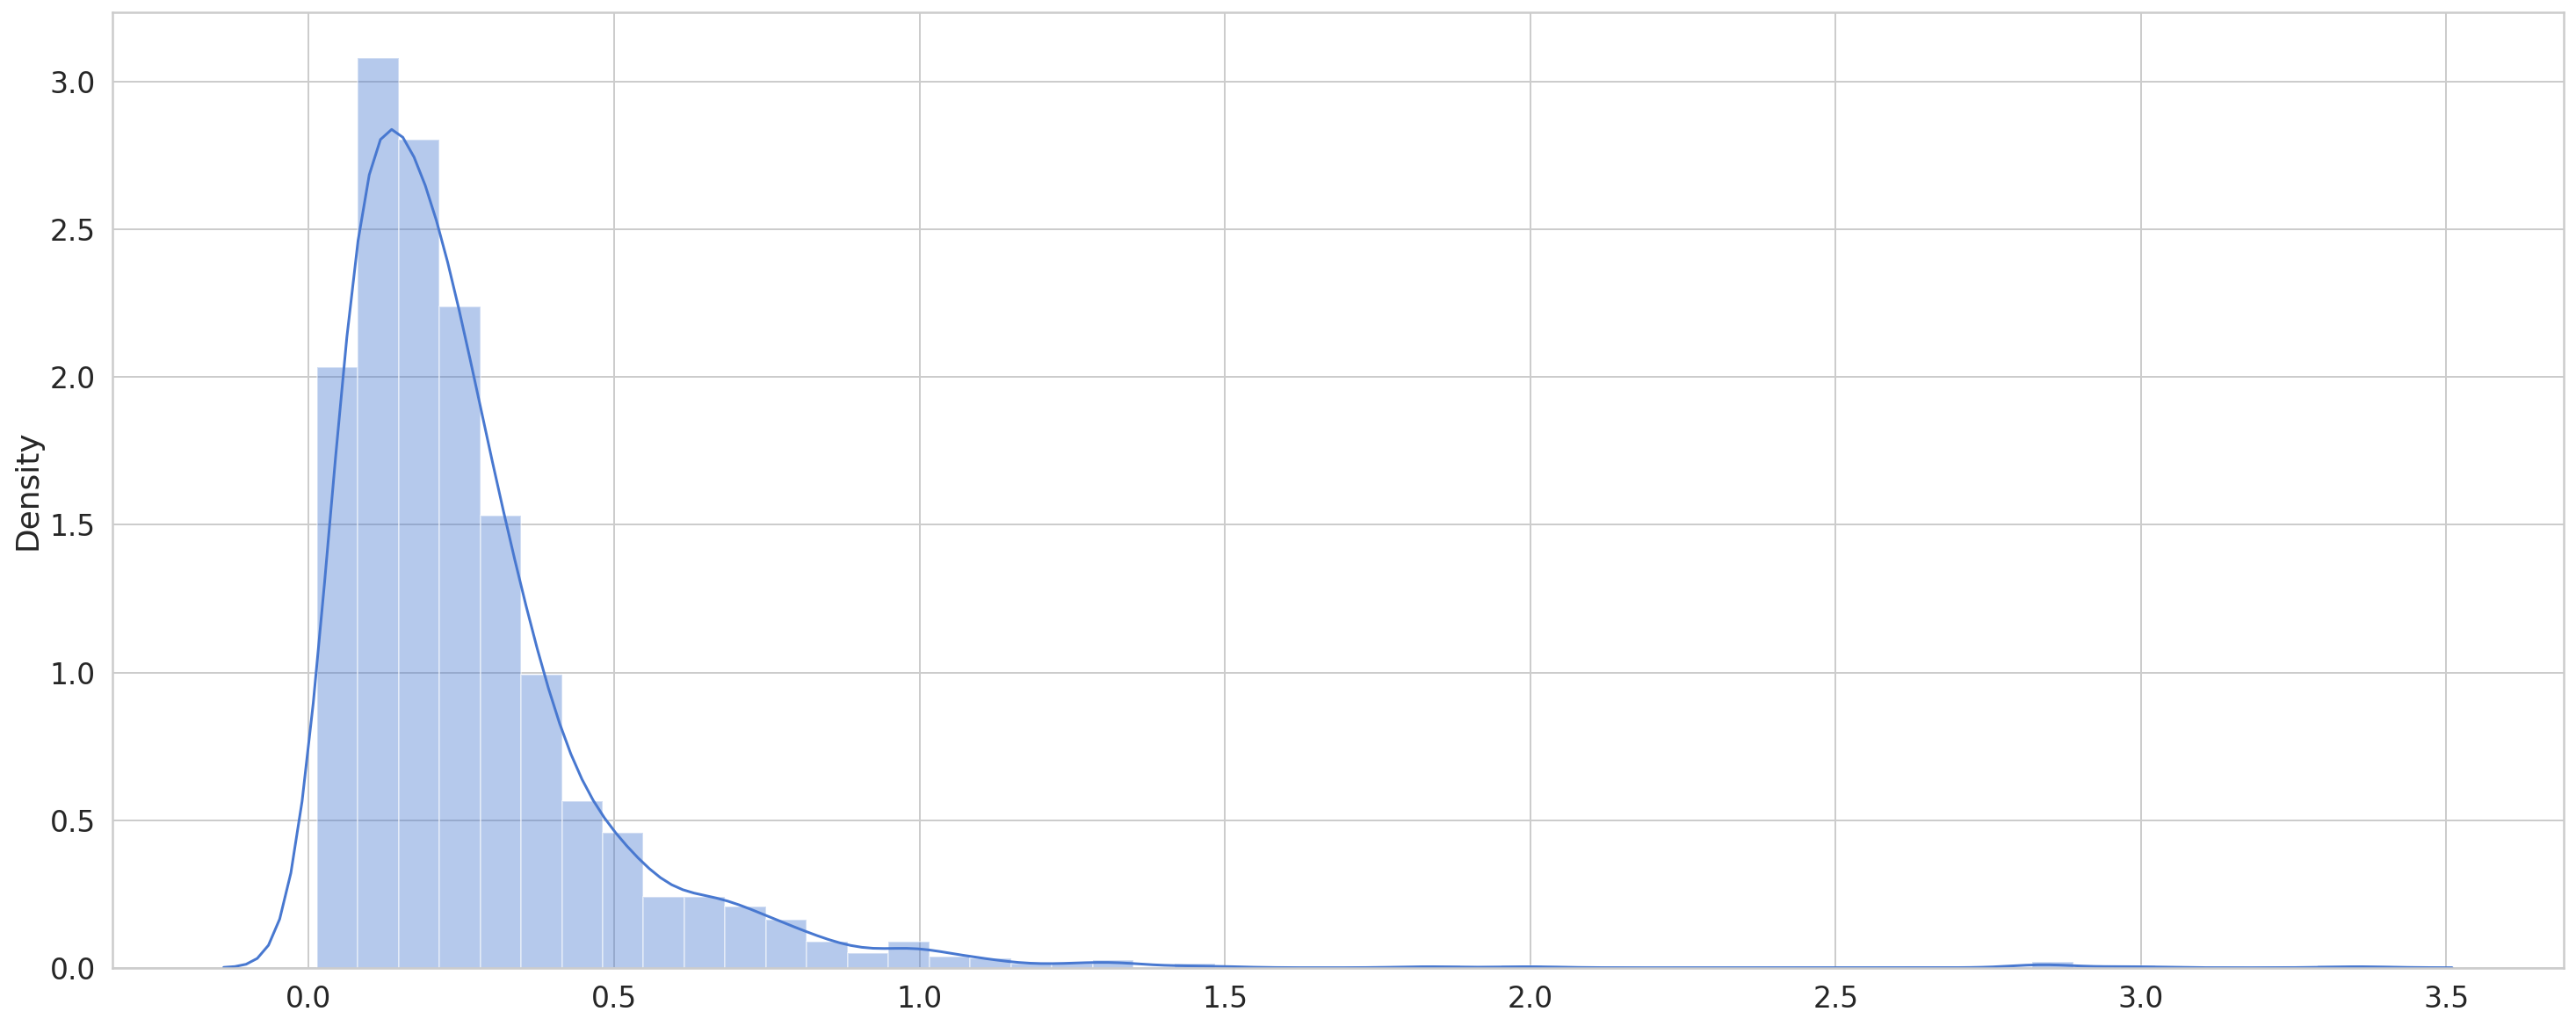

In [ ]:
X_test_predfreq1agression = model.predict(X_test1agression)


test_mae_lossfreq1agression = np.mean(np.abs(X_test_predfreq1agression - X_test1agression), axis=1)


plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1agression, bins=50, kde=True);

In [ ]:
predictfreq1agression = X_test_predfreq1agression[:,0]
test_predfreq1agression = pd.DataFrame(index=test1agression[TIME_STEPS:].index)
test_predfreq1agression['pred'] = scaler.inverse_transform(predictfreq1agression)
test_predfreq1agression


pred
created_at                          
2021-04-30 22:50:00+00:00  22.938610
2021-04-30 23:00:00+00:00  23.680254
2021-04-30 23:10:00+00:00  23.623997
2021-04-30 23:20:00+00:00  23.957983
2021-04-30 23:30:00+00:00  20.807323
...                              ...
2021-05-24 23:20:00+00:00  27.874628
2021-05-24 23:30:00+00:00  30.498987
2021-05-24 23:40:00+00:00  31.214613
2021-05-25 11:40:00+00:00  19.518848
2021-05-25 19:40:00+00:00  17.534670

[2383 rows x 1 columns]

In [ ]:
THRESHOLD = 0.3

test_score_dffreq1agression = pd.DataFrame(index=test1agression[TIME_STEPS:].index)
test_score_dffreq1agression['loss'] = test_mae_lossfreq1agression
test_score_dffreq1agression['threshold'] = THRESHOLD
test_score_dffreq1agression['anomaly'] = test_score_dffreq1agression.loss > test_score_dffreq1agression.threshold
test_score_dffreq1agression['nbtweet'] = test1agression[TIME_STEPS:].agression
test_score_dffreq1agression



loss  threshold  anomaly   nbtweet
created_at                                                       
2021-04-30 22:50:00+00:00  0.131774        0.3    False  0.503322
2021-04-30 23:00:00+00:00  0.146254        0.3    False  0.449771
2021-04-30 23:10:00+00:00  0.115995        0.3    False  0.503322
2021-04-30 23:20:00+00:00  0.086583        0.3    False  0.128465
2021-04-30 23:30:00+00:00  0.214552        0.3    False -0.139291
...                             ...        ...      ...       ...
2021-05-24 23:20:00+00:00  0.715458        0.3     True  0.931731
2021-05-24 23:30:00+00:00  0.575516        0.3     True  0.878180
2021-05-24 23:40:00+00:00  0.377810        0.3     True -0.460597
2021-05-25 11:40:00+00:00  0.754462        0.3     True  0.021362
2021-05-25 19:40:00+00:00  0.677265        0.3     True  0.021362

[2383 rows x 4 columns]

In [ ]:


import plotly.express as px


fig = px.bar(test_score_dffreq1agression, x=test_score_dffreq1agression.index, y="loss")
fig.add_scatter(x=test_score_dffreq1agression.index, y=test_score_dffreq1agression['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1agression.index, y=test_score_dffreq1agression['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1agression = test_score_dffreq1agression[test_score_dffreq1agression.anomaly == True]
anomaliesfreq1agression['nbtweet'] = scaler.inverse_transform(anomaliesfreq1agression['nbtweet'])
anomaliesfreq1agression.head(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



loss  threshold  anomaly  nbtweet
created_at                                                      
2021-04-30 23:40:00+00:00  0.336348        0.3     True     10.0
2021-04-30 23:50:00+00:00  0.369709        0.3     True     15.0

In [ ]:


import plotly.express as px

fig = px.line(test1agression, x=test1agression[TIME_STEPS:].index, y=scaler.inverse_transform(test1agression[TIME_STEPS:].agression) )
fig.add_scatter(x=anomaliesfreq1agression.index, y=anomaliesfreq1agression.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()




# paris

In [ ]:
history = model.fit(
    X_train1paris, y_train1paris, 
    epochs=35, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/35
78/78 [==============================] - 1s 7ms/step - loss: 3.0651 - val_loss: 5.9185
Epoch 2/35
78/78 [==============================] - 1s 7ms/step - loss: 3.0501 - val_loss: 5.8789
Epoch 3/35
78/78 [==============================] - 1s 7ms/step - loss: 3.0462 - val_loss: 5.8558
Epoch 4/35
78/78 [==============================] - 1s 7ms/step - loss: 3.0404 - val_loss: 5.8009
Epoch 5/35
78/78 [==============================] - 1s 7ms/step - loss: 3.0437 - val_loss: 5.7702
Epoch 6/35
78/78 [==============================] - 1s 7ms/step - loss: 3.0391 - val_loss: 5.8098
Epoch 7/35
78/78 [==============================] - 1s 7ms/step - loss: 3.0422 - val_loss: 5.8716
Epoch 8/35
78/78 [==============================] - 1s 7ms/step - loss: 3.0404 - val_loss: 5.8301
Epoch 9/35
78/78 [==============================] - 1s 7ms/step - loss: 3.0088 - val_loss: 5.8150
Epoch 10/35
78/78 [==============================] - 1s 7ms/step - loss: 3.0350 - val_loss: 5.8147
Epoch 11/35
78/78 [

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



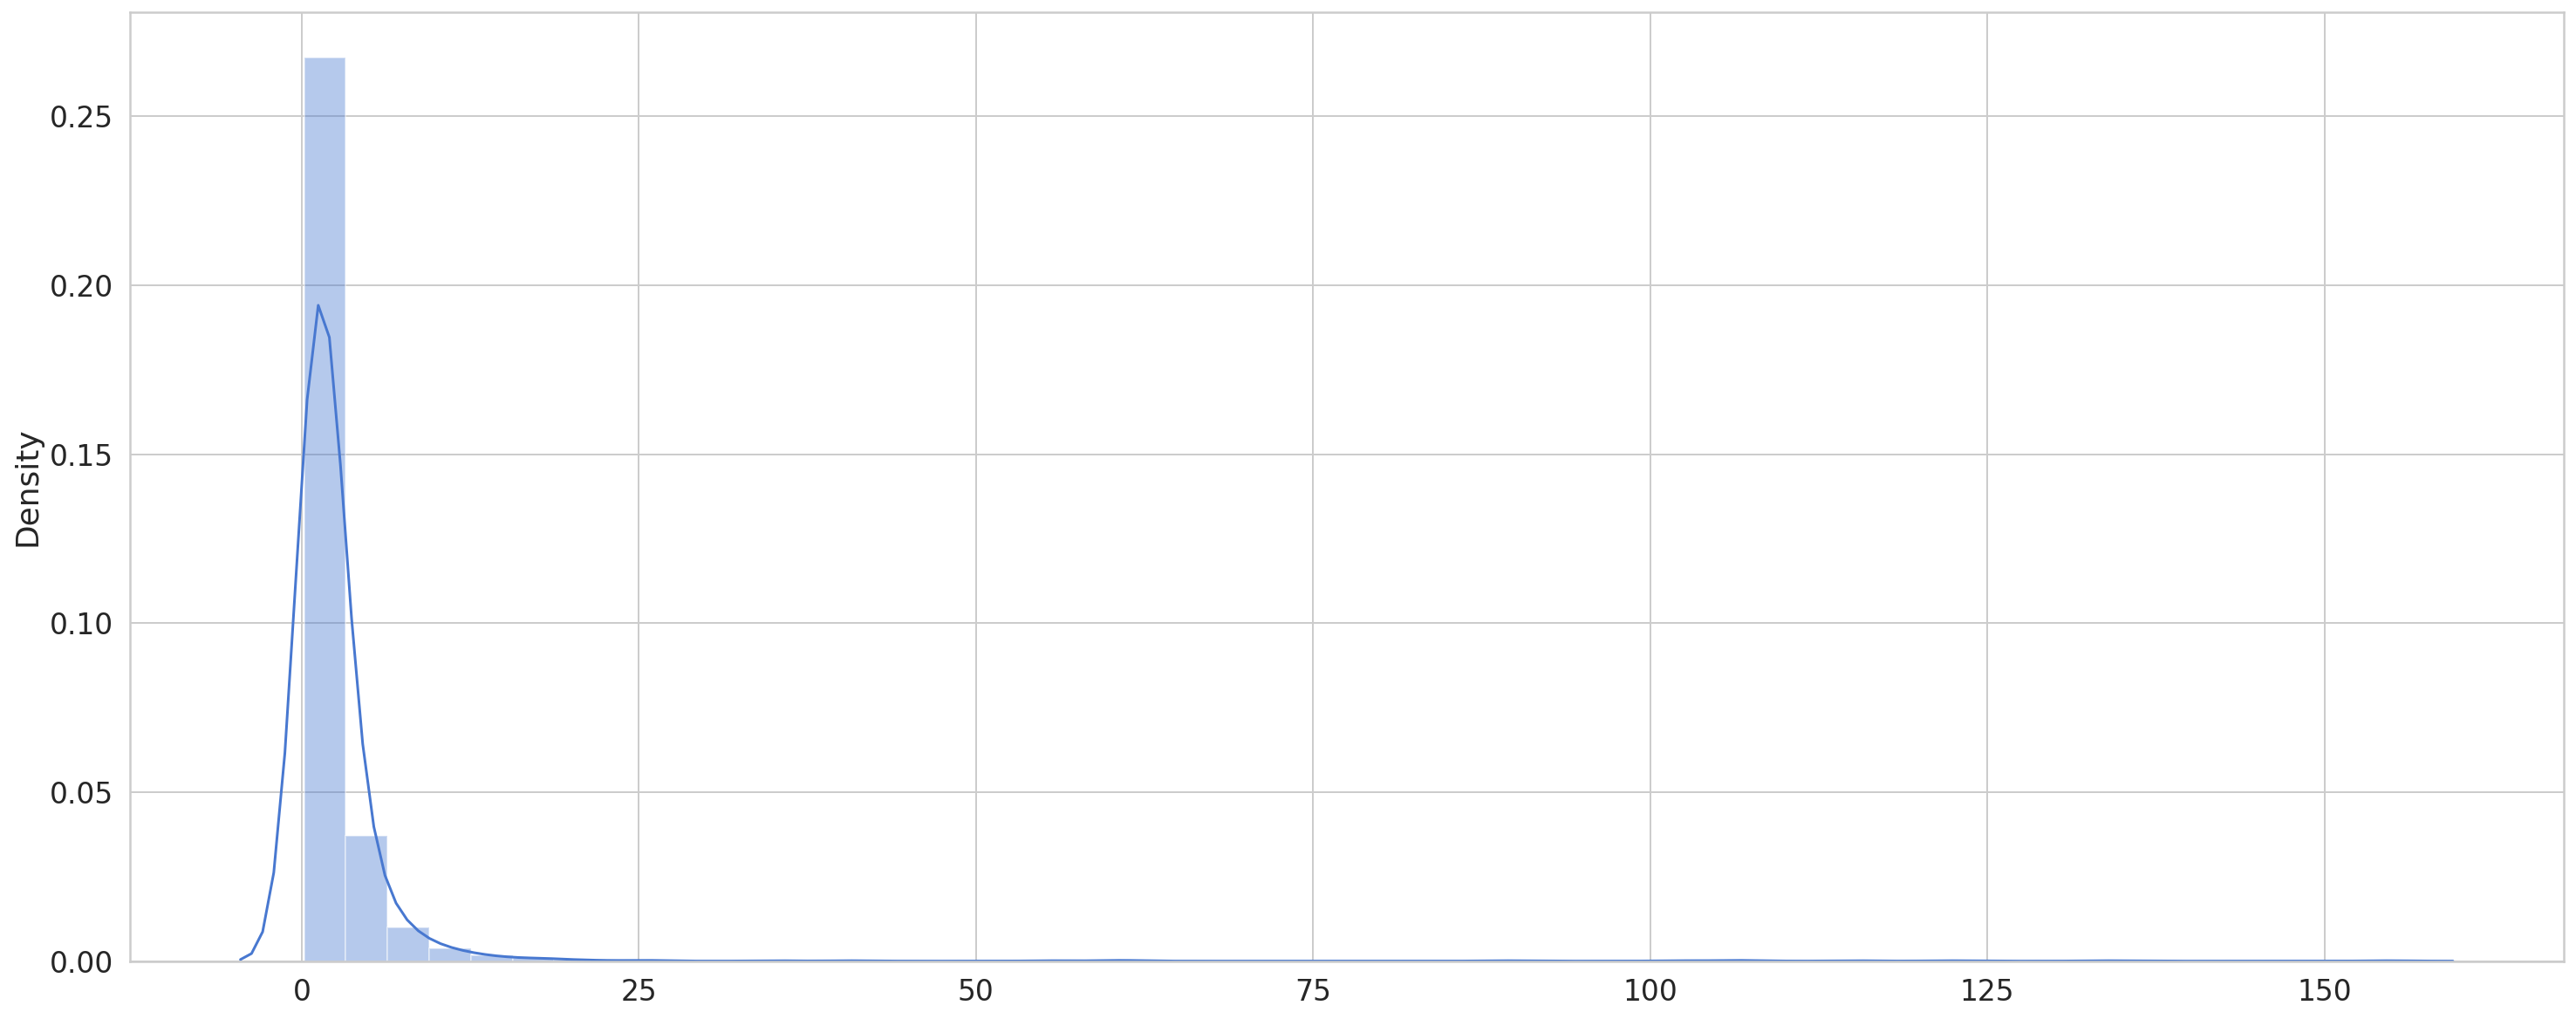

In [ ]:
X_test_predfreq1paris = model.predict(X_test1paris)


test_mae_lossfreq1paris = np.mean(np.abs(X_test_predfreq1paris - X_test1paris), axis=1)


plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1paris, bins=50, kde=True);

In [ ]:
predictfreq1paris = X_test_predfreq1paris[:,0]
test_predfreq1paris = pd.DataFrame(index=test1paris[TIME_STEPS:].index)
test_predfreq1paris['pred'] = scaler.inverse_transform(predictfreq1paris)
test_predfreq1paris


pred
created_at                           
2021-04-30 22:50:00+00:00  338.447540
2021-04-30 23:00:00+00:00  292.019531
2021-04-30 23:10:00+00:00  366.858246
2021-04-30 23:20:00+00:00  393.861237
2021-04-30 23:30:00+00:00  369.488007
...                               ...
2021-05-24 23:20:00+00:00  258.381134
2021-05-24 23:30:00+00:00  275.249146
2021-05-24 23:40:00+00:00  254.540207
2021-05-25 11:40:00+00:00  153.913589
2021-05-25 19:40:00+00:00  199.109360

[2383 rows x 1 columns]

In [ ]:


import plotly.express as px


fig = px.line(test1paris, x=test1paris[TIME_STEPS:].index, y=scaler.inverse_transform(test1paris[TIME_STEPS:].paris),title="data vs pred")

fig.add_scatter(x=test_predfreq1paris.index, y=test_predfreq1paris[TIME_STEPS:].pred, mode='lines',name="pred1",marker_color='rgba(255, 0, 0, .9)')
#fig.add_scatter(x=test_predfreq2.index, y=test_predfreq2[TIME_STEPS:].pred, mode='lines',name="pred2",marker_color='rgba(255, 15, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [ ]:
THRESHOLD = 4

test_score_dffreq1paris = pd.DataFrame(index=test1paris[TIME_STEPS:].index)
test_score_dffreq1paris['loss'] = test_mae_lossfreq1paris
test_score_dffreq1paris['threshold'] = THRESHOLD
test_score_dffreq1paris['anomaly'] = test_score_dffreq1paris.loss > test_score_dffreq1paris.threshold
test_score_dffreq1paris['nbtweet'] = test1paris[TIME_STEPS:].paris
test_score_dffreq1paris



loss  threshold  anomaly    nbtweet
created_at                                                        
2021-04-30 22:50:00+00:00  0.753226          4    False  13.837545
2021-04-30 23:00:00+00:00  1.562370          4    False  20.799188
2021-04-30 23:10:00+00:00  2.805920          4    False  21.709556
2021-04-30 23:20:00+00:00  2.951922          4    False  18.068082
2021-04-30 23:30:00+00:00  2.508064          4    False  15.015669
...                             ...        ...      ...        ...
2021-05-24 23:20:00+00:00  2.286381          4    False  14.158852
2021-05-24 23:30:00+00:00  1.012606          4    False  12.391666
2021-05-24 23:40:00+00:00  0.953611          4    False   3.609286
2021-05-25 11:40:00+00:00  5.733530          4     True  12.338114
2021-05-25 19:40:00+00:00  3.841023          4    False   8.000476

[2383 rows x 4 columns]

In [ ]:


import plotly.express as px


fig = px.bar(test_score_dffreq1paris, x=test_score_dffreq1paris.index, y="loss")
fig.add_scatter(x=test_score_dffreq1paris.index, y=test_score_dffreq1paris['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1paris.index, y=test_score_dffreq1paris['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1paris = test_score_dffreq1paris[test_score_dffreq1paris.anomaly == True]
anomaliesfreq1paris['nbtweet'] = scaler.inverse_transform(anomaliesfreq1paris['nbtweet'])
anomaliesfreq1paris.head(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



loss  threshold  anomaly  nbtweet
created_at                                                      
2021-04-30 23:50:00+00:00  5.823293          4     True    271.0
2021-05-01 09:20:00+00:00  4.572915          4     True    321.0

In [ ]:


import plotly.express as px

fig = px.line(test1paris, x=test1paris[TIME_STEPS:].index, y=scaler.inverse_transform(test1paris[TIME_STEPS:].paris) )
fig.add_scatter(x=anomaliesfreq1paris.index, y=anomaliesfreq1paris.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()




#nice

In [ ]:
history = model.fit(
    X_train1nice, y_train1nice, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/20
78/78 [==============================] - 1s 8ms/step - loss: 0.5821 - val_loss: 0.3263
Epoch 2/20
78/78 [==============================] - 1s 7ms/step - loss: 0.4356 - val_loss: 0.3157
Epoch 3/20
78/78 [==============================] - 1s 7ms/step - loss: 0.4175 - val_loss: 0.3178
Epoch 4/20
78/78 [==============================] - 1s 7ms/step - loss: 0.4096 - val_loss: 0.3163
Epoch 5/20
78/78 [==============================] - 1s 7ms/step - loss: 0.4005 - val_loss: 0.3162
Epoch 6/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3950 - val_loss: 0.3283
Epoch 7/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3938 - val_loss: 0.3309
Epoch 8/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3869 - val_loss: 0.3151
Epoch 9/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3864 - val_loss: 0.3257
Epoch 10/20
78/78 [==============================] - 1s 7ms/step - loss: 0.3832 - val_loss: 0.3151
Epoch 11/20
78/78 [

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



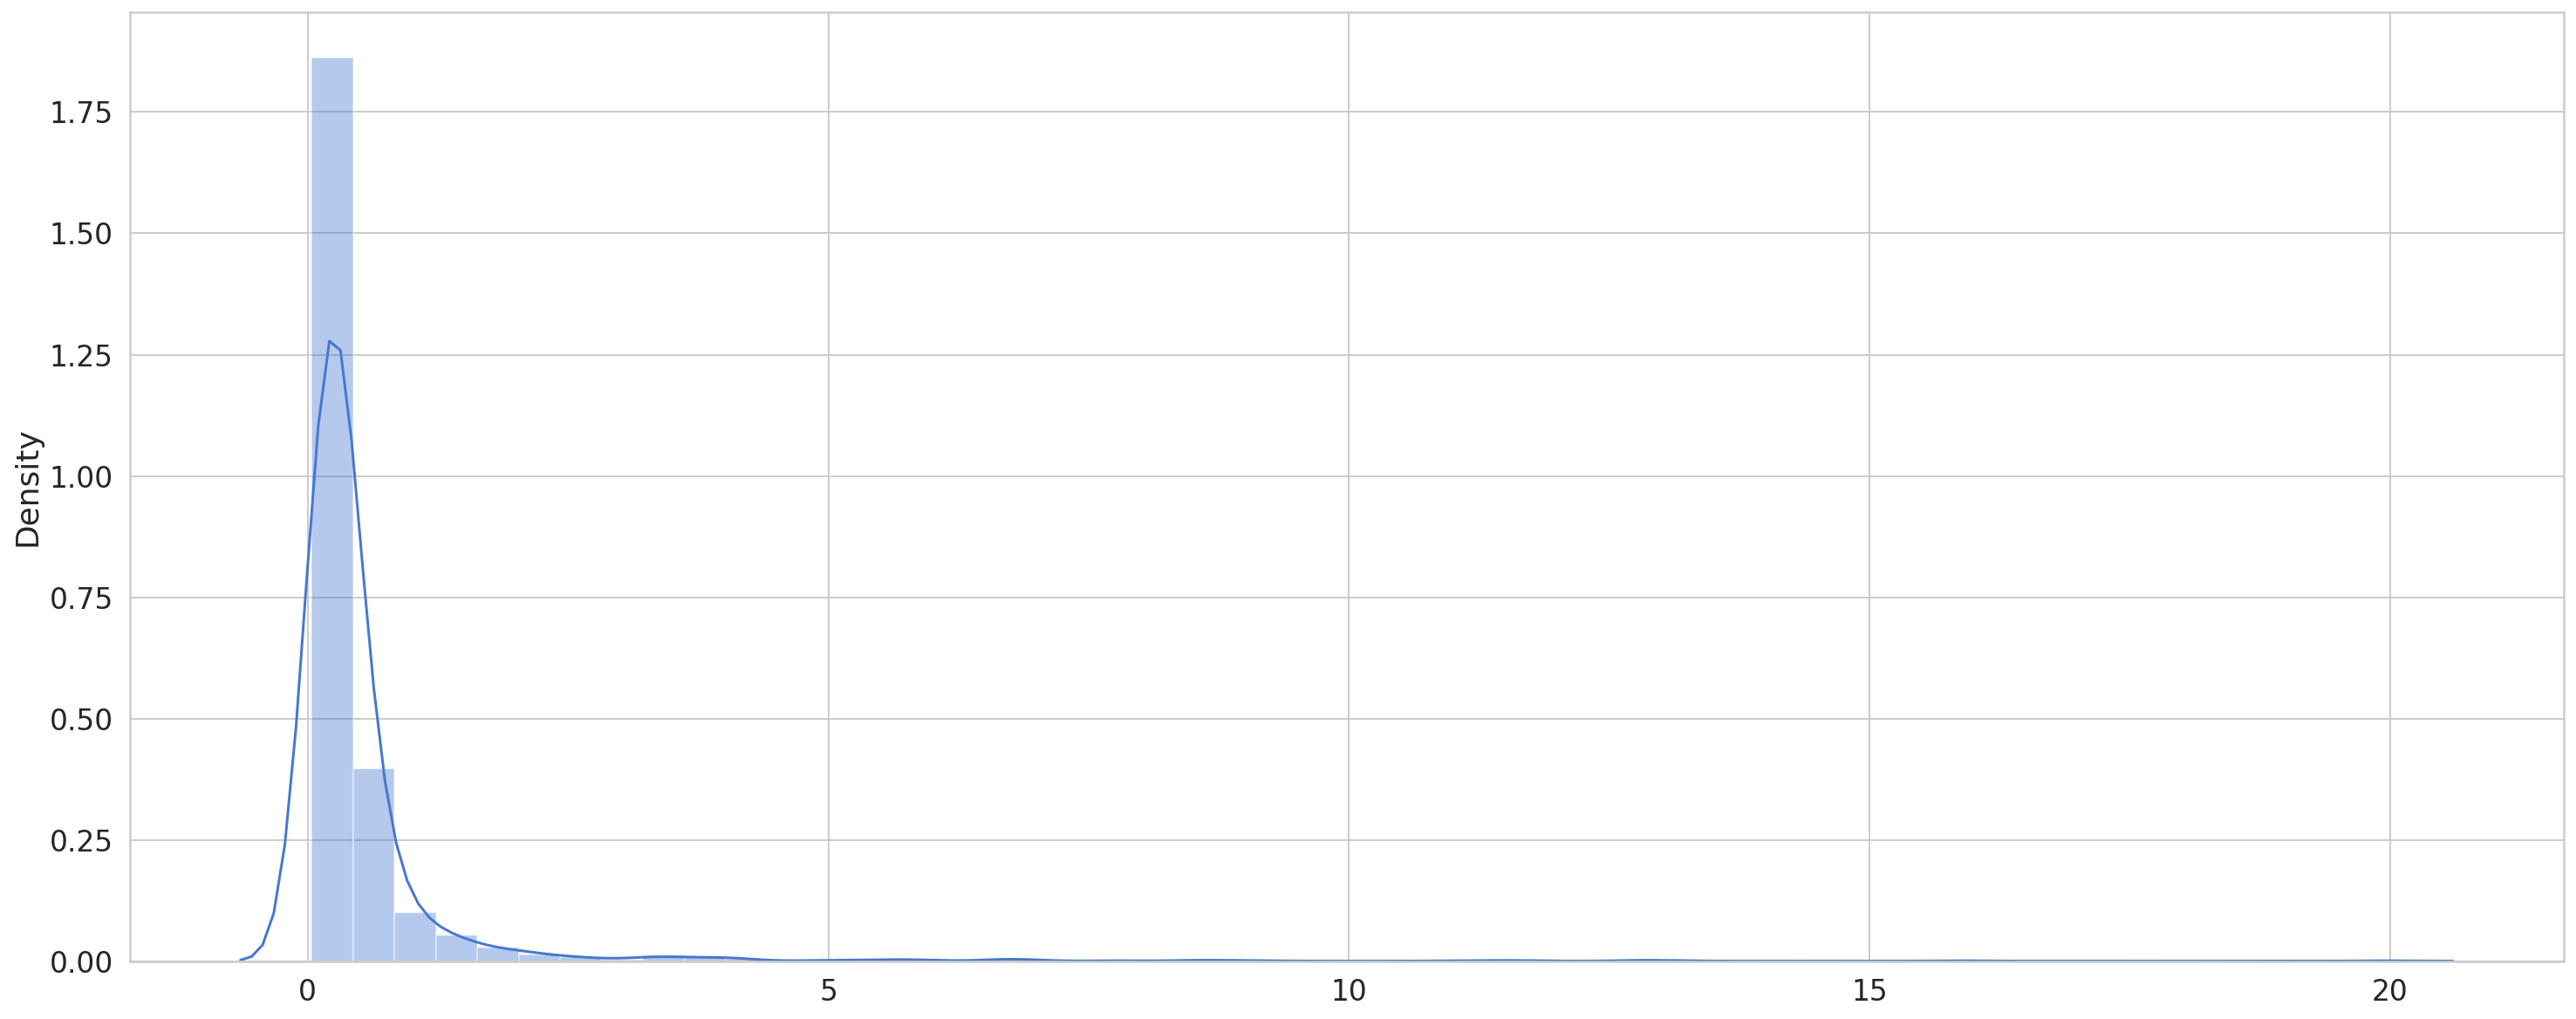

In [ ]:
X_test_predfreq1nice = model.predict(X_test1nice)

test_mae_lossfreq1nice = np.mean(np.abs(X_test_predfreq1nice - X_test1nice), axis=1)

plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1nice, bins=50, kde=True);

In [ ]:
predictfreq1nice = X_test_predfreq1nice[:,0]
test_predfreq1nice = pd.DataFrame(index=test1nice[TIME_STEPS:].index)
test_predfreq1nice['pred'] = scaler.inverse_transform(predictfreq1nice)
test_predfreq1nice


pred
created_at                          
2021-04-30 22:50:00+00:00  37.738388
2021-04-30 23:00:00+00:00  34.149136
2021-04-30 23:10:00+00:00  34.395088
2021-04-30 23:20:00+00:00  31.601105
2021-04-30 23:30:00+00:00  29.627773
...                              ...
2021-05-24 23:20:00+00:00  38.838562
2021-05-24 23:30:00+00:00  35.874378
2021-05-24 23:40:00+00:00  37.204758
2021-05-25 11:40:00+00:00  27.496763
2021-05-25 19:40:00+00:00  24.638796

[2383 rows x 1 columns]

In [ ]:
THRESHOLD = 0.5

test_score_dffreq1nice = pd.DataFrame(index=test1nice[TIME_STEPS:].index)
test_score_dffreq1nice['loss'] = test_mae_lossfreq1nice
test_score_dffreq1nice['threshold'] = THRESHOLD
test_score_dffreq1nice['anomaly'] = test_score_dffreq1nice.loss > test_score_dffreq1nice.threshold
test_score_dffreq1nice['nbtweet'] = test1nice[TIME_STEPS:].nice
test_score_dffreq1nice


loss  threshold  anomaly   nbtweet
created_at                                                       
2021-04-30 22:50:00+00:00  0.279711        0.5    False  0.663976
2021-04-30 23:00:00+00:00  0.371706        0.5    False  0.931731
2021-04-30 23:10:00+00:00  0.371205        0.5    False  0.717527
2021-04-30 23:20:00+00:00  0.390493        0.5    False  0.663976
2021-04-30 23:30:00+00:00  0.164476        0.5    False  0.663976
...                             ...        ...      ...       ...
2021-05-24 23:20:00+00:00  0.378355        0.5    False  0.985282
2021-05-24 23:30:00+00:00  0.230923        0.5    False  1.306589
2021-05-24 23:40:00+00:00  0.169771        0.5    False -0.514149
2021-05-25 11:40:00+00:00  0.724504        0.5     True -0.085740
2021-05-25 19:40:00+00:00  0.709300        0.5     True  1.734998

[2383 rows x 4 columns]

In [ ]:


import plotly.express as px


fig = px.bar(test_score_dffreq1nice, x=test_score_dffreq1nice.index, y="loss")
fig.add_scatter(x=test_score_dffreq1nice.index, y=test_score_dffreq1nice['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1nice.index, y=test_score_dffreq1nice['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1nice = test_score_dffreq1nice[test_score_dffreq1nice.anomaly == True]
anomaliesfreq1nice['nbtweet'] = scaler.inverse_transform(anomaliesfreq1nice['nbtweet'])
anomaliesfreq1nice.head(2)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



loss  threshold  anomaly  nbtweet
created_at                                                      
2021-05-01 02:40:00+00:00  1.446426        0.5     True     32.0
2021-05-01 02:50:00+00:00  0.986064        0.5     True     17.0

In [ ]:


import plotly.express as px

fig = px.line(test1nice, x=test1nice[TIME_STEPS:].index, y=scaler.inverse_transform(test1nice[TIME_STEPS:].nice) )
fig.add_scatter(x=anomaliesfreq1nice.index, y=anomaliesfreq1nice.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()




#lyon

In [ ]:
history = model.fit(
    X_train1lyon, y_train1lyon, 
    epochs=10, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/10
78/78 [==============================] - 1s 8ms/step - loss: 0.9100 - val_loss: 0.5613
Epoch 2/10
78/78 [==============================] - 1s 7ms/step - loss: 0.8858 - val_loss: 0.5977
Epoch 3/10
78/78 [==============================] - 1s 7ms/step - loss: 0.8706 - val_loss: 0.5576
Epoch 4/10
78/78 [==============================] - 1s 7ms/step - loss: 0.8724 - val_loss: 0.5756
Epoch 5/10
78/78 [==============================] - 1s 7ms/step - loss: 0.8817 - val_loss: 0.5810
Epoch 6/10
78/78 [==============================] - 1s 7ms/step - loss: 0.8771 - val_loss: 0.5668
Epoch 7/10
78/78 [==============================] - 1s 7ms/step - loss: 0.8695 - val_loss: 0.5500
Epoch 8/10
78/78 [==============================] - 1s 7ms/step - loss: 0.8558 - val_loss: 0.5484
Epoch 9/10
78/78 [==============================] - 1s 7ms/step - loss: 0.8556 - val_loss: 0.5816
Epoch 10/10
78/78 [==============================] - 1s 7ms/step - loss: 0.8474 - val_loss: 0.5562


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



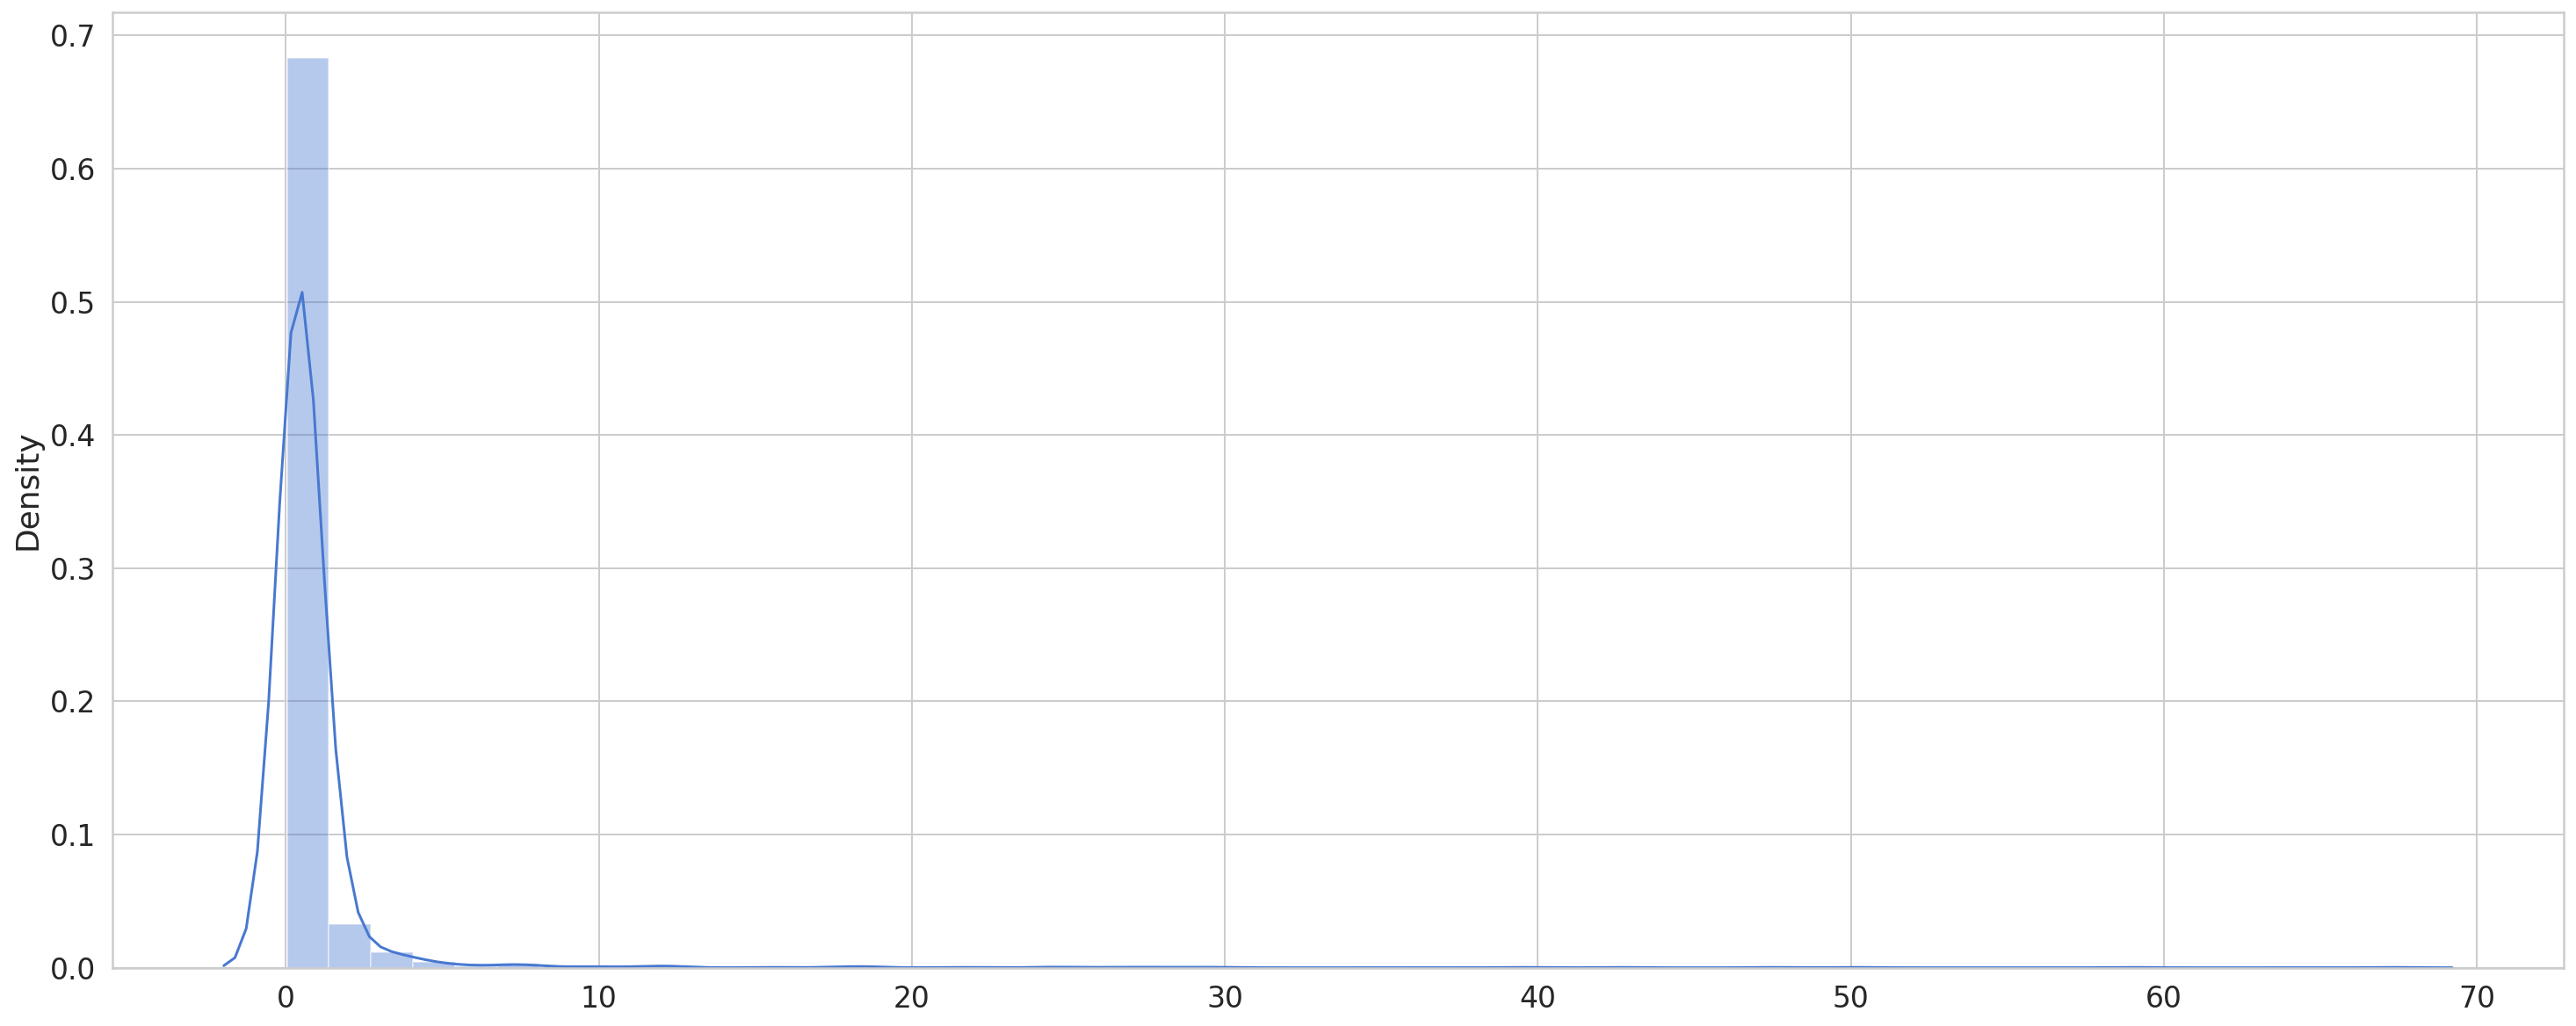

In [ ]:
X_test_predfreq1lyon = model.predict(X_test1lyon)

test_mae_lossfreq1lyon = np.mean(np.abs(X_test_predfreq1lyon - X_test1lyon), axis=1)

plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1lyon, bins=50, kde=True);

In [ ]:
predictfreq1lyon = X_test_predfreq1lyon[:,0]
test_predfreq1lyon = pd.DataFrame(index=test1lyon[TIME_STEPS:].index)
test_predfreq1lyon['pred'] = scaler.inverse_transform(predictfreq1lyon)
test_predfreq1lyon


pred
created_at                           
2021-04-30 22:50:00+00:00   60.368790
2021-04-30 23:00:00+00:00   61.488037
2021-04-30 23:10:00+00:00   61.332310
2021-04-30 23:20:00+00:00   62.396454
2021-04-30 23:30:00+00:00   61.458599
...                               ...
2021-05-24 23:20:00+00:00   87.177254
2021-05-24 23:30:00+00:00  100.245041
2021-05-24 23:40:00+00:00   87.657204
2021-05-25 11:40:00+00:00   61.636002
2021-05-25 19:40:00+00:00   38.382072

[2383 rows x 1 columns]

In [ ]:


import plotly.express as px


fig = px.line(test1lyon, x=test1lyon[TIME_STEPS:].index, y=scaler.inverse_transform(test1lyon[TIME_STEPS:].lyon),title="data vs pred")

fig.add_scatter(x=test_predfreq1lyon.index, y=test_predfreq1lyon[TIME_STEPS:].pred, mode='lines',name="pred1",marker_color='rgba(255, 0, 0, .9)')
#fig.add_scatter(x=test_predfreq2.index, y=test_predfreq2[TIME_STEPS:].pred, mode='lines',name="pred2",marker_color='rgba(255, 15, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [ ]:
THRESHOLD = 0.5

test_score_dffreq1lyon = pd.DataFrame(index=test1lyon[TIME_STEPS:].index)
test_score_dffreq1lyon['loss'] = test_mae_lossfreq1lyon
test_score_dffreq1lyon['threshold'] = THRESHOLD
test_score_dffreq1lyon['anomaly'] = test_score_dffreq1lyon.loss > test_score_dffreq1lyon.threshold
test_score_dffreq1lyon['nbtweet'] = test1lyon[TIME_STEPS:].lyon
test_score_dffreq1lyon


loss  threshold  anomaly   nbtweet
created_at                                                       
2021-04-30 22:50:00+00:00  0.293004        0.5    False  2.377611
2021-04-30 23:00:00+00:00  0.057886        0.5    False  2.377611
2021-04-30 23:10:00+00:00  0.042876        0.5    False  2.484713
2021-04-30 23:20:00+00:00  0.076156        0.5    False  2.324060
2021-04-30 23:30:00+00:00  0.046672        0.5    False  2.806019
...                             ...        ...      ...       ...
2021-05-24 23:20:00+00:00  1.786618        0.5     True  5.376472
2021-05-24 23:30:00+00:00  1.424054        0.5     True  3.609286
2021-05-24 23:40:00+00:00  1.174364        0.5     True  0.985282
2021-05-25 11:40:00+00:00  1.706575        0.5     True -0.246393
2021-05-25 19:40:00+00:00  2.028170        0.5     True  2.109855

[2383 rows x 4 columns]

In [ ]:


import plotly.express as px


fig = px.bar(test_score_dffreq1lyon, x=test_score_dffreq1lyon.index, y="loss")
fig.add_scatter(x=test_score_dffreq1lyon.index, y=test_score_dffreq1lyon['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1lyon.index, y=test_score_dffreq1lyon['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1lyon = test_score_dffreq1lyon[test_score_dffreq1lyon.anomaly == True]
anomaliesfreq1lyon['nbtweet'] = scaler.inverse_transform(anomaliesfreq1lyon['nbtweet'])
anomaliesfreq1lyon.head(2)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



loss  threshold  anomaly  nbtweet
created_at                                                      
2021-05-01 00:20:00+00:00  0.575886        0.5     True     37.0
2021-05-01 00:40:00+00:00  0.658499        0.5     True     36.0

In [ ]:


import plotly.express as px

fig = px.line(test1lyon, x=test1lyon[TIME_STEPS:].index, y=scaler.inverse_transform(test1lyon[TIME_STEPS:].lyon) )
fig.add_scatter(x=anomaliesfreq1lyon.index, y=anomaliesfreq1lyon.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()





# terroriste
---



In [ ]:
history = model.fit(
    X_train1terroriste, y_train1terroriste, 
    epochs=10, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/10
78/78 [==============================] - 1s 8ms/step - loss: 0.4047 - val_loss: 0.3301
Epoch 2/10
78/78 [==============================] - 1s 7ms/step - loss: 0.3768 - val_loss: 0.3192
Epoch 3/10
78/78 [==============================] - 1s 7ms/step - loss: 0.3807 - val_loss: 0.3116
Epoch 4/10
78/78 [==============================] - 1s 7ms/step - loss: 0.3774 - val_loss: 0.3138
Epoch 5/10
78/78 [==============================] - 1s 7ms/step - loss: 0.3747 - val_loss: 0.3318
Epoch 6/10
78/78 [==============================] - 1s 7ms/step - loss: 0.3717 - val_loss: 0.3124
Epoch 7/10
78/78 [==============================] - 1s 7ms/step - loss: 0.3749 - val_loss: 0.3205
Epoch 8/10
78/78 [==============================] - 1s 7ms/step - loss: 0.3628 - val_loss: 0.3121
Epoch 9/10
78/78 [==============================] - 1s 7ms/step - loss: 0.3656 - val_loss: 0.3144
Epoch 10/10
78/78 [==============================] - 1s 7ms/step - loss: 0.3722 - val_loss: 0.3200


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



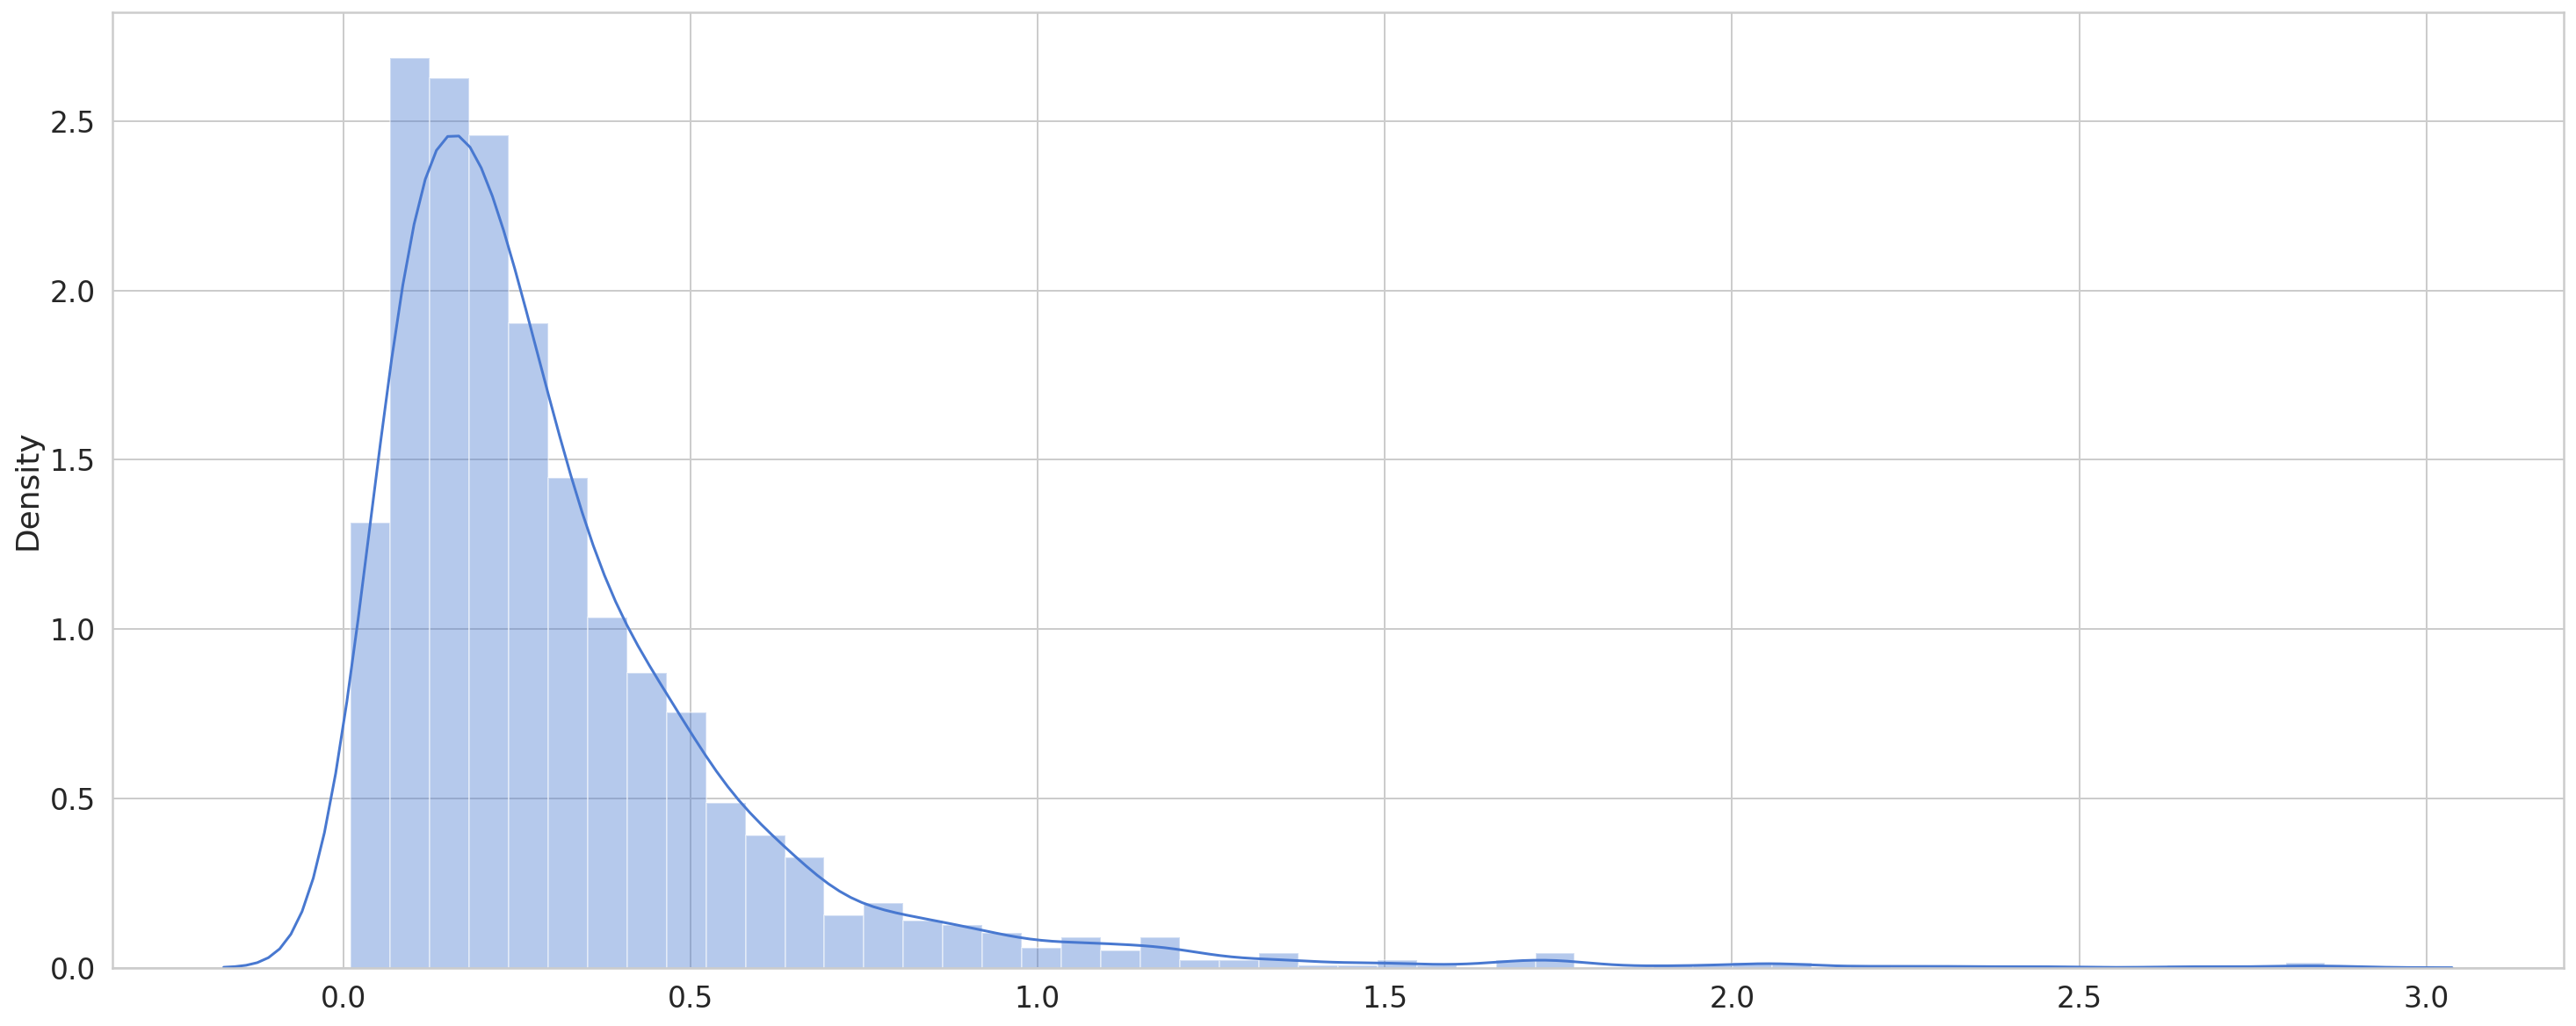

In [ ]:
X_test_predfreq1terroriste = model.predict(X_test1terroriste)


test_mae_lossfreq1terroriste = np.mean(np.abs(X_test_predfreq1terroriste - X_test1terroriste), axis=1)

plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1terroriste, bins=50, kde=True);

In [ ]:
predictfreq1terroriste = X_test_predfreq1terroriste[:,0]
test_predfreq1terroriste = pd.DataFrame(index=test1terroriste[TIME_STEPS:].index)
test_predfreq1terroriste['pred'] = scaler.inverse_transform(predictfreq1terroriste)
test_predfreq1terroriste


pred
created_at                          
2021-04-30 22:50:00+00:00  30.831892
2021-04-30 23:00:00+00:00  26.072924
2021-04-30 23:10:00+00:00  27.026386
2021-04-30 23:20:00+00:00  29.795210
2021-04-30 23:30:00+00:00  26.572186
...                              ...
2021-05-24 23:20:00+00:00  16.068092
2021-05-24 23:30:00+00:00  18.723179
2021-05-24 23:40:00+00:00  16.806778
2021-05-25 11:40:00+00:00  10.447655
2021-05-25 19:40:00+00:00   7.865360

[2383 rows x 1 columns]

In [ ]:


import plotly.express as px


fig = px.line(test1terroriste, x=test1terroriste[TIME_STEPS:].index, y=scaler.inverse_transform(test1terroriste[TIME_STEPS:].terroriste),title="data vs pred")

fig.add_scatter(x=test_predfreq1terroriste.index, y=test_predfreq1terroriste[TIME_STEPS:].pred, mode='lines',name="pred1",marker_color='rgba(255, 0, 0, .9)')
#fig.add_scatter(x=test_predfreq2.index, y=test_predfreq2[TIME_STEPS:].pred, mode='lines',name="pred2",marker_color='rgba(255, 15, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [ ]:
THRESHOLD = 0.3

test_score_dffreq1terroriste = pd.DataFrame(index=test1terroriste[TIME_STEPS:].index)
test_score_dffreq1terroriste['loss'] = test_mae_lossfreq1terroriste
test_score_dffreq1terroriste['threshold'] = THRESHOLD
test_score_dffreq1terroriste['anomaly'] = test_score_dffreq1terroriste.loss > test_score_dffreq1terroriste.threshold
test_score_dffreq1terroriste['nbtweet'] = test1terroriste[TIME_STEPS:].terroriste
test_score_dffreq1terroriste



loss  threshold  anomaly   nbtweet
created_at                                                       
2021-04-30 22:50:00+00:00  0.395506        0.3     True  0.235567
2021-04-30 23:00:00+00:00  0.428284        0.3     True  0.663976
2021-04-30 23:10:00+00:00  0.342385        0.3     True  1.145935
2021-04-30 23:20:00+00:00  0.312064        0.3     True  0.449771
2021-04-30 23:30:00+00:00  0.305027        0.3     True  0.342669
...                             ...        ...      ...       ...
2021-05-24 23:20:00+00:00  0.214884        0.3    False  0.342669
2021-05-24 23:30:00+00:00  0.220200        0.3    False -0.032189
2021-05-24 23:40:00+00:00  0.180858        0.3    False -0.781904
2021-05-25 11:40:00+00:00  0.472000        0.3     True -0.674802
2021-05-25 19:40:00+00:00  0.464403        0.3     True -0.781904

[2383 rows x 4 columns]

In [ ]:


import plotly.express as px


fig = px.bar(test_score_dffreq1terroriste, x=test_score_dffreq1terroriste.index, y="loss")
fig.add_scatter(x=test_score_dffreq1terroriste.index, y=test_score_dffreq1terroriste['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1terroriste.index, y=test_score_dffreq1terroriste['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1terroriste = test_score_dffreq1terroriste[test_score_dffreq1terroriste.anomaly == True]
anomaliesfreq1terroriste['nbtweet'] = scaler.inverse_transform(anomaliesfreq1terroriste['nbtweet'])
anomaliesfreq1terroriste.head(2)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



loss  threshold  anomaly  nbtweet
created_at                                                      
2021-04-30 22:50:00+00:00  0.395506        0.3     True     21.0
2021-04-30 23:00:00+00:00  0.428284        0.3     True     29.0

In [ ]:


import plotly.express as px

fig = px.line(test1terroriste, x=test1terroriste[TIME_STEPS:].index, y=scaler.inverse_transform(test1terroriste[TIME_STEPS:].terroriste) )
fig.add_scatter(x=anomaliesfreq1terroriste.index, y=anomaliesfreq1terroriste.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()




In [ ]:
#plot frequences séparées avec anomalies détectées (1er mai)

import plotly.express as px


fig = px.line(test1attaque, x=test1attaque[TIME_STEPS:].index, y=scaler.inverse_transform(test1attaque[TIME_STEPS:].attaque) )
fig.add_scatter(x=anomaliesfreq1attaque.index, y=anomaliesfreq1attaque.nbtweet, mode='markers',name="anomalies")
fig.add_scatter(x=test1attaque[TIME_STEPS:].index, y=scaler.inverse_transform(test1attaque[TIME_STEPS:].attaque), mode='lines',name="attaque")

fig.add_scatter(x=anomaliesfreq1incendie.index, y=anomaliesfreq1incendie.nbtweet, mode='markers',name="anomalies")
fig.add_scatter(x=test1incendie[TIME_STEPS:].index, y=scaler.inverse_transform(test1incendie[TIME_STEPS:].incendie), mode='lines',name="incendie")

fig.add_scatter(x=anomaliesfreq1secours.index, y=anomaliesfreq1secours.nbtweet, mode='markers',name="anomalies")
fig.add_scatter(x=test1secours[TIME_STEPS:].index, y=scaler.inverse_transform(test1secours[TIME_STEPS:].secours), mode='lines',name="secours")

fig.add_scatter(x=anomaliesfreq1agression.index, y=anomaliesfreq1agression.nbtweet, mode='markers',name="anomalies")
fig.add_scatter(x=test1agression[TIME_STEPS:].index, y=scaler.inverse_transform(test1agression[TIME_STEPS:].agression), mode='lines',name="agression")

fig.add_scatter(x=anomaliesfreq1accident.index, y=anomaliesfreq1accident.nbtweet, mode='markers',name="anomalies")
fig.add_scatter(x=test1accident[TIME_STEPS:].index, y=scaler.inverse_transform(test1accident[TIME_STEPS:].accident), mode='lines',name="accident")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)


#le 1 mai paris
shape_dict = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 10:58:00', 'x1':'2021-05-01 11:10:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict2 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 12:00:00', 'x1':'2021-05-01 12:10:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict3 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 13:04:00', 'x1':'2021-05-01 13:14:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict4 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 14:19:00', 'x1':'2021-05-01 14:29:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict5 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 14:48:00', 'x1':'2021-05-01 14:58:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict6 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 15:46:00', 'x1':'2021-05-01 15:56:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict7= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 16:37:00', 'x1':'2021-05-01 16:47:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict8 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 16:53:00', 'x1':'2021-05-01 17:03:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict9 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 16:42:00', 'x1':'2021-05-01 16:52:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict10= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 17:02:00', 'x1':'2021-05-01 17:12:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict11 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 17:36:00', 'x1':'2021-05-01 17:46:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict12 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 17:51:00', 'x1':'2021-05-01 18:01:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict13 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 18:33:00', 'x1':'2021-05-01 18:34:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
#lyon
shape_dict14 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 08:30:00', 'x1':'2021-05-01 08:40:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict15 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 09:00:00', 'x1':'2021-05-01 09:10:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict16 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 09:11:00', 'x1':'2021-05-01 09:21:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict17 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 09:30:00', 'x1':'2021-05-01 09:40:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict18 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 10:00:00', 'x1':'2021-05-01 10:10:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict19 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 10:20:00', 'x1':'2021-05-01 10:30:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict20 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 10:30:00', 'x1':'2021-05-01 10:40:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict21 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 11:15:00', 'x1':'2021-05-01 11:25:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict22 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 08:00:00', 'x1':'2021-05-01 08:10:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict23= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 11:44:00', 'x1':'2021-05-01 11:54:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}



#fig.show()
fig.update_layout(shapes=[shape_dict,shape_dict2,shape_dict3,shape_dict4,shape_dict5,shape_dict6,shape_dict7,shape_dict8,shape_dict9,shape_dict10,shape_dict11,shape_dict12,shape_dict13,shape_dict14,shape_dict15,shape_dict16,shape_dict17,shape_dict18,shape_dict19,shape_dict20,shape_dict21,shape_dict22,shape_dict23])

#fig.write_html("lstm1ermai.html")

In [ ]:

#plot frequence globale avec anomalies détectées (1er mai)
import plotly.express as px

fig = px.line(test1freqtotale, x=test1freqtotale[TIME_STEPS:].index, y=scaler.inverse_transform(test1freqtotale[TIME_STEPS:].freqtotale) )
fig.add_scatter(x=anomaliesfreq1.index, y=anomaliesfreq1.nbtweet, mode='markers',name="anomalies")


fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)


#le 1 mai paris
shape_dict = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 10:58:00', 'x1':'2021-05-01 11:10:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict2 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 12:00:00', 'x1':'2021-05-01 12:10:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict3 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 13:04:00', 'x1':'2021-05-01 13:14:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict4 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 14:19:00', 'x1':'2021-05-01 14:29:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict5 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 14:48:00', 'x1':'2021-05-01 14:58:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict6 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 15:46:00', 'x1':'2021-05-01 15:56:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict7= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 16:37:00', 'x1':'2021-05-01 16:47:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict8 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 16:53:00', 'x1':'2021-05-01 17:03:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict9 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 16:42:00', 'x1':'2021-05-01 16:52:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict10= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 17:02:00', 'x1':'2021-05-01 17:12:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict11 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 17:36:00', 'x1':'2021-05-01 17:46:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict12 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 17:51:00', 'x1':'2021-05-01 18:01:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict13 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 18:33:00', 'x1':'2021-05-01 18:34:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
#lyon
shape_dict14 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 08:30:00', 'x1':'2021-05-01 08:40:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict15 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 09:00:00', 'x1':'2021-05-01 09:10:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict16 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 09:11:00', 'x1':'2021-05-01 09:21:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict17 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 09:30:00', 'x1':'2021-05-01 09:40:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict18 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 10:00:00', 'x1':'2021-05-01 10:10:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict19 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 10:20:00', 'x1':'2021-05-01 10:30:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict20 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 10:30:00', 'x1':'2021-05-01 10:40:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict21 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 11:15:00', 'x1':'2021-05-01 11:25:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict22 = {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 08:00:00', 'x1':'2021-05-01 08:10:00', 'y0':0, 'y1':1, 'fillcolor': 'red', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict23= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-01 11:44:00', 'x1':'2021-05-01 11:54:00', 'y0':0, 'y1':1, 'fillcolor': 'black', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}



#fig.show()
fig.update_layout(shapes=[shape_dict,shape_dict2,shape_dict3,shape_dict4,shape_dict5,shape_dict6,shape_dict7,shape_dict8,shape_dict9,shape_dict10,shape_dict11,shape_dict12,shape_dict13,shape_dict14,shape_dict15,shape_dict16,shape_dict17,shape_dict18,shape_dict19,shape_dict20,shape_dict21,shape_dict22,shape_dict23])

#fig.write_html("lstm1ermaifreqtotale.html")

In [ ]:
#plot frequences séparées avec anomalies détectées (15 mai)

import plotly.express as px


fig=px.line(test2terroriste,x=test2paris[TIME_STEPS:].index, y=scaler.inverse_transform(test2terroriste[TIME_STEPS:].terroriste))
#fig.add_scatter(x=anomaliesfreq2.index, y=anomaliesfreq2.nbtweet, mode='markers',name="anomalies")

fig.add_scatter(x=anomaliesfreq2paris.index, y=anomaliesfreq2paris.nbtweet, mode='markers',name="anomalies")
fig.add_scatter(x=test2paris[TIME_STEPS:].index, y=scaler.inverse_transform(test2paris[TIME_STEPS:].paris), mode='lines',name="paris")

fig.add_scatter(x=anomaliesfreq2lyon.index, y=anomaliesfreq2lyon.nbtweet, mode='markers',name="anomalies")
fig.add_scatter(x=test2lyon[TIME_STEPS:].index, y=scaler.inverse_transform(test2lyon[TIME_STEPS:].lyon), mode='lines',name="lyon")

fig.add_scatter(x=anomaliesfreq2nice.index, y=anomaliesfreq2nice.nbtweet, mode='markers',name="anomalies")
fig.add_scatter(x=test2nice[TIME_STEPS:].index, y=scaler.inverse_transform(test2nice[TIME_STEPS:].nice), mode='lines',name="nice")

fig.add_scatter(x=anomaliesfreq2attaque.index, y=anomaliesfreq2attaque.nbtweet, mode='markers',name="anomalies")
fig.add_scatter(x=test2attaque[TIME_STEPS:].index, y=scaler.inverse_transform(test2attaque[TIME_STEPS:].attaque), mode='lines',name="attaque")

fig.add_scatter(x=anomaliesfreq2terroriste.index, y=anomaliesfreq2terroriste.nbtweet, mode='markers',name="anomalies")
fig.add_scatter(x=test2terroriste[TIME_STEPS:].index, y=scaler.inverse_transform(test2terroriste[TIME_STEPS:].terroriste), mode='lines',name="terroriste")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

#le 15 mai paris
shape_dict24= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 12:40:00', 'x1':'2021-05-15 12:50:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict25= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 13:13:00', 'x1':'2021-05-15 13:23:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict26= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 13:15:00', 'x1':'2021-05-15 13:25:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict27= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 13:30:00', 'x1':'2021-05-15 13:40:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict28= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 14:39:00', 'x1':'2021-05-15 14:49:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict29= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 14:45:00', 'x1':'2021-05-15 14:55:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
#lille
shape_dict30= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 13:55:00', 'x1':'2021-05-15 14:05:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
#marseille
shape_dict31= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 13:00:00', 'x1':'2021-05-15 13:10:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
#stasbourg
shape_dict32= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 15:23:00', 'x1':'2021-05-15 15:33:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
#lyon
shape_dict33= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 13:00:00', 'x1':'2021-05-15 13:10:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}



#fig.show()
fig.update_layout(shapes=[shape_dict24,shape_dict25,shape_dict26,shape_dict27,shape_dict28,shape_dict29,shape_dict30,shape_dict31,shape_dict32,shape_dict33])


fig.show()
fig.write_html('lstm15mai.html')



In [ ]:
#plot frequence globale avec anomalies détectées (15 mai)

import plotly.express as px

fig = px.line(test2freqtotale, x=test2freqtotale[TIME_STEPS:].index, y=scaler.inverse_transform(test2freqtotale[TIME_STEPS:].freqtotale) )
fig.add_scatter(x=test2freqtotale[TIME_STEPS:].index, y=scaler.inverse_transform(test2freqtotale[TIME_STEPS:].freqtotale), mode='lines',name="frequence totale")

fig.add_scatter(x=anomaliesfreq2.index, y=anomaliesfreq2.nbtweet, mode='markers',name="anomalies")

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

#le 15 mai paris
shape_dict24= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 12:40:00', 'x1':'2021-05-15 12:50:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict25= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 13:13:00', 'x1':'2021-05-15 13:23:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict26= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 13:15:00', 'x1':'2021-05-15 13:25:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict27= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 13:30:00', 'x1':'2021-05-15 13:40:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict28= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 14:39:00', 'x1':'2021-05-15 14:49:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
shape_dict29= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 14:45:00', 'x1':'2021-05-15 14:55:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
#lille
shape_dict30= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 13:55:00', 'x1':'2021-05-15 14:05:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
#marseille
shape_dict31= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 13:00:00', 'x1':'2021-05-15 13:10:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
#stasbourg
shape_dict32= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 15:23:00', 'x1':'2021-05-15 15:33:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}
#lyon
shape_dict33= {'type':'rect', 'xref':'x', 'yref':'paper', 'x0':'2021-05-15 13:00:00', 'x1':'2021-05-15 13:10:00', 'y0':0, 'y1':1, 'fillcolor': 'blue', 'layer': 'below', 'opacity': 0.25, 'line_width': 0}



#fig.show()
fig.update_layout(shapes=[shape_dict24,shape_dict25,shape_dict26,shape_dict27,shape_dict28,shape_dict29,shape_dict30,shape_dict31,shape_dict32,shape_dict33])


fig.show()
fig.write_html('lstm15maifreqtot.html')

